# **ABSTRACT**
The used and refurbished device market has grown considerably over the past decade as it provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. Here is a sample dataset of normalized used and new pricing data of refurbished / used devices.

**DataSet Variables:**

device_brand: Name of manufacturing brand

os: OS on which the device runs

screen_size: Size of the screen in cm

4g: Whether 4G is available or not

5g: Whether 5G is available or not

front_camera_mp: Resolution of the rear camera in megapixels

back_camera_mp: Resolution of the front camera in megapixels

internal_memory: Amount of internal memory (ROM) in GB

ram: Amount of RAM in GB

battery: Energy capacity of the device battery in mAh

weight: Weight of the device in grams

release_year: Year when the device model was released

days_used: Number of days the used/refurbished device has been used

normalized_new_price: Normalized price of a new device of the same model

normalized_used_price (TARGET): Normalized price of the used/refurbished device

**Numerical Datatypes:**

screen_size: Size of the screen in cm

front_camera_mp: Resolution of the rear camera in megapixels

back_camera_mp: Resolution of the front camera in megapixels

internal_memory: Amount of internal memory (ROM) in GB

ram: Amount of RAM in GB

battery: Energy capacity of the device battery in mAh

weight: Weight of the device in grams

release_year: Year when the device model was released

days_used: Number of days the used/refurbished device has been used

normalized_new_price: Normalized price of a new device of the same model

normalized_used_price (TARGET): Normalized price of the used/refurbished device

**Categorical:**

device_brand: Name of manufacturing brand os: OS on which the device runs 4g: Whether 4G is available or not 5g: Whether 5G is available or not

**Installing dependencies**

In [1]:
##Installing all the required libraries for the Assignment
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install fitter

import csv
import json
import logging
import optparse
import os
import random
import sys
import time
from datetime import datetime
from distutils.util import strtobool

# Importing all the libararies required for the assignment
import h2o
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psutil
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
from matplotlib.pyplot import figure

sns.set(rc={"figure.figsize": (16, 8)})

# Data Imputation
!pip install fancyimpute
from fancyimpute import IterativeImputer as MICE

# Model Interpretation
!pip install shap
import shap
from sklearn.model_selection import train_test_split

  Created wheel for h2o: filename=h2o-3.40.0.3-py2.py3-none-any.whl size=177694734 sha256=e27202b5cb971775ee486ae14e19618d53b66d7f34bcbb48a2b4b491583b5e79
  Stored in directory: c:\users\aish\appdata\local\pip\cache\wheels\5f\47\b0\e93517fb516f4c26e5a4027170388cc28a5019c46617403fe1
Successfully built h2o
  Created wheel for fitter: filename=fitter-1.5.2-py3-none-any.whl size=25595 sha256=877f825c744dda23f38a6c80b20fba549fe57336dab1eaf736ed95f7939edd4b
  Stored in directory: c:\users\aish\appdata\local\pip\cache\wheels\8e\6b\cb\628035771acab95dc84f200590b4838c7c3095a70ede67a25a
Successfully built fitter
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29895 sha256=5052ec5d0485b15f94e6f65fe33aa18685aa8e9ebb0fae16c60dae801461461c
  Stored in directory: c:\users\aish\appdata\local\pip\cache\wheels\45\e1\7c\5f6e503d959df84af6d91e87ae288961a906f895d910f6533b
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11358 sha256=494619b69df

  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4


# **What question are you trying to answer? How did you frame it as an ML task?**


*   Here I am trying to predict the price of a used device based on some of its features like price of the new device, 4g/5g specification of the device, release_year, os, days_used, screen_size, battery, weight, devicee_brand, ram etc 
*  The prices - used and new prices have been normalized here. Most of the features are also numerical like weight, battery, ram etc, but there are also some categorical variables like os, device_brand, etc, which I convereted into numerical using various methods based on the variable and then built serveral models to predict the normalized_used_price which is our target variable. 



# **What is human-level performance on that task? What level of performance is needed?**

Human-level performance on this task would be the ability to accurately predict the normalized used price of a device based on the given variables in the dataset, without any errors or bias. This means that the model's predictions would be on par with the predictions made by a human expert in the field.

The level of performance needed would depend on the specific application and context in which the model is being used. For example, if the model is being used by a company to determine the optimal price to sell their refurbished devices, they may require high accuracy and precision in their predictions to maximize profits. On the other hand, if the model is being used for academic research purposes, the level of performance needed may be less stringent.

In [3]:
udd_df_pandas = pd.read_csv(
    "https://raw.githubusercontent.com/adduriAishwarya/Model-Interpretability/main/used_device_data.csv"
)  # Reading CSV file into Pandas DataFrame

**Where did the feature data and label come from?**

# **Exploratory Data Analysis**

In [145]:
# Checking Data Type of each variable
udd_df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [146]:
# Checking for any null values in the dataset, as we hav no null values - we are good to go.
udd_df_pandas.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [147]:
# Shape of the dataframe - Here, we have 1143 samples of data with 12 predictors and 1 result

udd_df_pandas.shape

(3454, 15)

In [148]:
udd_df_pandas.describe()

screen_size  rear_camera_mp  front_camera_mp  internal_memory  \
count  3454.000000     3275.000000      3452.000000      3450.000000   
mean     13.713115        9.460208         6.554229        54.573099   
std       3.805280        4.815461         6.970372        84.972371   
min       5.080000        0.080000         0.000000         0.010000   
25%      12.700000        5.000000         2.000000        16.000000   
50%      12.830000        8.000000         5.000000        32.000000   
75%      15.340000       13.000000         8.000000        64.000000   
max      30.710000       48.000000        32.000000      1024.000000   

               ram      battery       weight  release_year    days_used  \
count  3450.000000  3448.000000  3447.000000   3454.000000  3454.000000   
mean      4.036122  3133.402697   182.751871   2015.965258   674.869716   
std       1.365105  1299.682844    88.413228      2.298455   248.580166   
min       0.020000   500.000000    69.000000   2013.000000    91.000000   
25%       4.000000  2100.000000   142.000000   2014.000000   533.500000   
50%       4.000000  3000.000000   160.000000   2015.500000   690.500000   
75%       4.000000  4000.000000   185.000000   2018.000000   868.750000   
max      12.000000  9720.000000   855.000000   2020.000000  1094.000000   

       normalized_used_price  normalized_new_price  
count            3454.000000           3454.000000  
mean                4.364712              5.233107  
std                 0.588914              0.683637  
min                 1.536867              2.901422  
25%                 4.033931              4.790342  
50%                 4.405133              5.245892  
75%                 4.755700              5.673718  
max                 6.619433              7.847841

In [149]:
columns = list(udd_df_pandas.columns)
print(columns)  # Name of all predictors and result

['device_brand', 'os', 'screen_size', '4g', '5g', 'rear_camera_mp', 'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used', 'normalized_used_price', 'normalized_new_price']


In [150]:
# udd_df_pandas.dropna(
#     axis=0,
#     how='any',
#     thresh=None,
#     subset=None,
#     inplace=True
# )

**One HOT ENCODING FOR '4g' and '5g' variables**


In [151]:
dict_G = {'yes':1,'no':0}

In [152]:
udd_df_pandas['4g'] = udd_df_pandas['4g'].map(dict_G)

In [153]:
udd_df_pandas['5g'] = udd_df_pandas['5g'].map(dict_G)

In [154]:
print(udd_df_pandas)

     device_brand       os  screen_size  4g  5g  rear_camera_mp  \
0           Honor  Android        14.50   1   0            13.0   
1           Honor  Android        17.30   1   1            13.0   
2           Honor  Android        16.69   1   1            13.0   
3           Honor  Android        25.50   1   1            13.0   
4           Honor  Android        15.32   1   0            13.0   
...           ...      ...          ...  ..  ..             ...   
3449         Asus  Android        15.34   1   0             NaN   
3450         Asus  Android        15.24   1   0            13.0   
3451      Alcatel  Android        15.80   1   0            13.0   
3452      Alcatel  Android        15.80   1   0            13.0   
3453      Alcatel  Android        12.83   1   0            13.0   

      front_camera_mp  internal_memory  ram  battery  weight  release_year  \
0                 5.0             64.0  3.0   3020.0   146.0          2020   
1                16.0            128.0 

**mapping device brand into median values of each normalised_used_price for each brand.**

In [155]:
brand_dict = udd_df_pandas.groupby(['device_brand'])['normalized_used_price'].median().to_dict()
udd_df_pandas['Device_Brand'] = udd_df_pandas['device_brand'].map(brand_dict)

In [156]:
udd_df_pandas = udd_df_pandas[['os','screen_size', '4g','5g', 'release_year', 'days_used', 
             'normalized_used_price', 'normalized_new_price', 'rear_camera_mp', 
             'front_camera_mp', 'internal_memory',
             'ram', 'battery', 'weight', 'Device_Brand']]

In [157]:
udd_df_pandas = pd.get_dummies(udd_df_pandas)

In [158]:
udd_df_pandas.head()

screen_size  4g  5g  release_year  days_used  normalized_used_price  \
0        14.50   1   0          2020        127               4.307572   
1        17.30   1   1          2020        325               5.162097   
2        16.69   1   1          2020        162               5.111084   
3        25.50   1   1          2020        345               5.135387   
4        15.32   1   0          2020        293               4.389995   

   normalized_new_price  rear_camera_mp  front_camera_mp  internal_memory  \
0              4.715100            13.0              5.0             64.0   
1              5.519018            13.0             16.0            128.0   
2              5.884631            13.0              8.0            128.0   
3              5.630961            13.0              8.0             64.0   
4              4.947837            13.0              8.0             64.0   

   ram  battery  weight  Device_Brand  os_Android  os_Others  os_Windows  \
0  3.0   3020.0   146.0      4.683326           1          0           0   
1  8.0   4300.0   213.0      4.683326           1          0           0   
2  8.0   4200.0   213.0      4.683326           1          0           0   
3  6.0   7250.0   480.0      4.683326           1          0           0   
4  3.0   5000.0   185.0      4.683326           1          0           0   

   os_iOS  
0       0  
1       0  
2       0  
3       0  
4       0

**Using Dummies to encode OS into numerical features**

In [159]:
udd_df_pandas = pd.get_dummies(udd_df_pandas)

In [160]:
udd_df_pandas.head()

screen_size  4g  5g  release_year  days_used  normalized_used_price  \
0        14.50   1   0          2020        127               4.307572   
1        17.30   1   1          2020        325               5.162097   
2        16.69   1   1          2020        162               5.111084   
3        25.50   1   1          2020        345               5.135387   
4        15.32   1   0          2020        293               4.389995   

   normalized_new_price  rear_camera_mp  front_camera_mp  internal_memory  \
0              4.715100            13.0              5.0             64.0   
1              5.519018            13.0             16.0            128.0   
2              5.884631            13.0              8.0            128.0   
3              5.630961            13.0              8.0             64.0   
4              4.947837            13.0              8.0             64.0   

   ram  battery  weight  Device_Brand  os_Android  os_Others  os_Windows  \
0  3.0   3020.0   146.0      4.683326           1          0           0   
1  8.0   4300.0   213.0      4.683326           1          0           0   
2  8.0   4200.0   213.0      4.683326           1          0           0   
3  6.0   7250.0   480.0      4.683326           1          0           0   
4  3.0   5000.0   185.0      4.683326           1          0           0   

   os_iOS  
0       0  
1       0  
2       0  
3       0  
4       0

In [161]:
udd_df_pandas.isnull().sum()

screen_size                0
4g                         0
5g                         0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
Device_Brand               0
os_Android                 0
os_Others                  0
os_Windows                 0
os_iOS                     0
dtype: int64

# **IMPUTATION**

In [162]:
!pip install impyute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [163]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Define function to calculate percentage change
def percentage_change(original, imputed):
    div = original.copy()
    div[div == 0] = 1  # Avoid division by 0
    return np.mean(np.abs((original - imputed) / div)) * 100

# Define percentages of missing data to test
percentages = [1, 5, 10]

# Create copy of original dataset
df = udd_df_pandas.copy()

# Replace NaN values with 0
df.fillna(0, inplace=True)

# Loop over percentages of missing data
for percent in percentages:
    # Randomly remove specified percentage of values
    df_missing = df.copy()
    mask = np.random.choice([False, True], size=df_missing.shape, p=[1-percent/100, percent/100])
    df_missing[mask] = np.nan
    
    # Mean imputation
    imputer_mean = SimpleImputer(strategy='mean')
    df_mean = pd.DataFrame(imputer_mean.fit_transform(df_missing), columns=df_missing.columns)
    
    # Median imputation
    imputer_median = SimpleImputer(strategy='median')
    df_median = pd.DataFrame(imputer_median.fit_transform(df_missing), columns=df_missing.columns)
    
    # Calculate residuals
    residuals_mean = df - df_mean
    residuals_median = df - df_median
    
    # Calculate average % error on residuals
    print(f"Average % error on residuals for {percent}% missing data imputed using Mean Imputation:")
    print(percentage_change(df.values, df_mean.values))
    print(f"Average % error on residuals for {percent}% missing data imputed using Median Imputation:")
    print(percentage_change(df.values, df_median.values))


Average % error on residuals for 1% missing data imputed using Mean Imputation:
0.8296871719402373
Average % error on residuals for 1% missing data imputed using Median Imputation:
0.7246293856840323
Average % error on residuals for 5% missing data imputed using Mean Imputation:
13.639168731126913
Average % error on residuals for 5% missing data imputed using Median Imputation:
12.207853271961227
Average % error on residuals for 10% missing data imputed using Mean Imputation:
16.301122492712505
Average % error on residuals for 10% missing data imputed using Median Imputation:
12.822250066142452


since, median imputation is giving the least error %, replace the missing values with the impuated values from median imputation

In [164]:
imputer_median = SimpleImputer(strategy='median')
udd_df_imputed = pd.DataFrame(imputer_median.fit_transform(udd_df_pandas), columns=udd_df_pandas.columns)


In [165]:
udd_df_imputed.isnull().sum()

screen_size              0
4g                       0
5g                       0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
rear_camera_mp           0
front_camera_mp          0
internal_memory          0
ram                      0
battery                  0
weight                   0
Device_Brand             0
os_Android               0
os_Others                0
os_Windows               0
os_iOS                   0
dtype: int64

No more null or missing values. 

# **Interpreting the Imputation Methods**
 

*   From the above readings we can conclude that the Median imputation works well when compared to the Mean imputation method as the imputed value is a function of rest of the features.
*   We can also observe that the % error of residuals increase as the missing data points increase. From this we can conclude that if we have less missing data in the dataset, more perfectly it is imputed back by the imputation method.

# **Why Imputing data is always better than deleting the row ?**

Imputing missing data is generally considered better than deleting the corresponding rows because it preserves the sample size and therefore increases the power of the analysis. When missing data is deleted, the resulting dataset may not be representative of the population it was intended to represent, leading to biased and inaccurate results.

Additionally, deleting rows with missing data can lead to loss of important information that is present in the other variables of the dataset. This loss of information can reduce the accuracy of the analysis and limit the ability to make valid inferences.

Imputing missing data, on the other hand, allows for the retention of valuable information from the other variables in the dataset, thereby increasing the precision and validity of the analysis. Imputing missing values also helps to reduce bias and improve the overall representativeness of the sample.

# **NORMALIZATION OF VALUES**

In [166]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data
udd_df_imputed_scaled = pd.DataFrame(scaler.fit_transform(udd_df_imputed), columns=udd_df_imputed.columns)


Here, a MinMaxScaler object is created by instantiating the class. Then, the fit_transform method is called on the scaler object, passing in the udd_df_imputed DataFrame as an argument. This method scales and transforms the data in the DataFrame, with the minimum value of each feature being scaled to 0 and the maximum value being scaled to 1.

Finally, the resulting scaled data is converted back to a DataFrame and assigned to the variable udd_df_imputed_scaled. The columns parameter is set to the original column names of the udd_df_imputed DataFrame to ensure that the resulting DataFrame has the same column names as the original dataset.

Scaling the features in a dataset is important for machine learning algorithms because it helps to ensure that features with larger values do not dominate the analysis, and that all features are treated equally. Additionally, many machine learning algorithms perform better on scaled data, particularly those that use distance-based metrics, such as k-nearest neighbors and support vector machines.

Next, 
the Fitter class from the fitter library is then used to fit a range of probability distributions to the values in the column. The distributions parameter is set to get_common_distributions(), which specifies a list of common probability distributions to fit, including Normal, Exponential, Gamma, and others.

The fit method is then called on the f object to fit the distributions to the data. The resulting summary of the fitting process is printed using the summary method.

Finally, the plt functions from the matplotlib library are used to create a density plot of the fitted distributions for each column. 

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 11.71it/s]


         sumsquare_error         aic          bic  kl_div  ks_statistic  \
cauchy        808.821133  222.136414 -4997.913363     inf      0.206403   
lognorm       846.860277  222.291418 -4831.027408     inf      0.186990   
gamma         847.972196  230.649031 -4826.495315     inf      0.184052   
chi2          847.972217  230.648866 -4826.495228     inf      0.184052   
norm          853.886427  305.208303 -4810.636102     inf      0.193581   

             ks_pvalue  
cauchy   1.584446e-129  
lognorm  3.336398e-106  
gamma    7.012329e-103  
chi2     7.011346e-103  
norm     7.440307e-114  


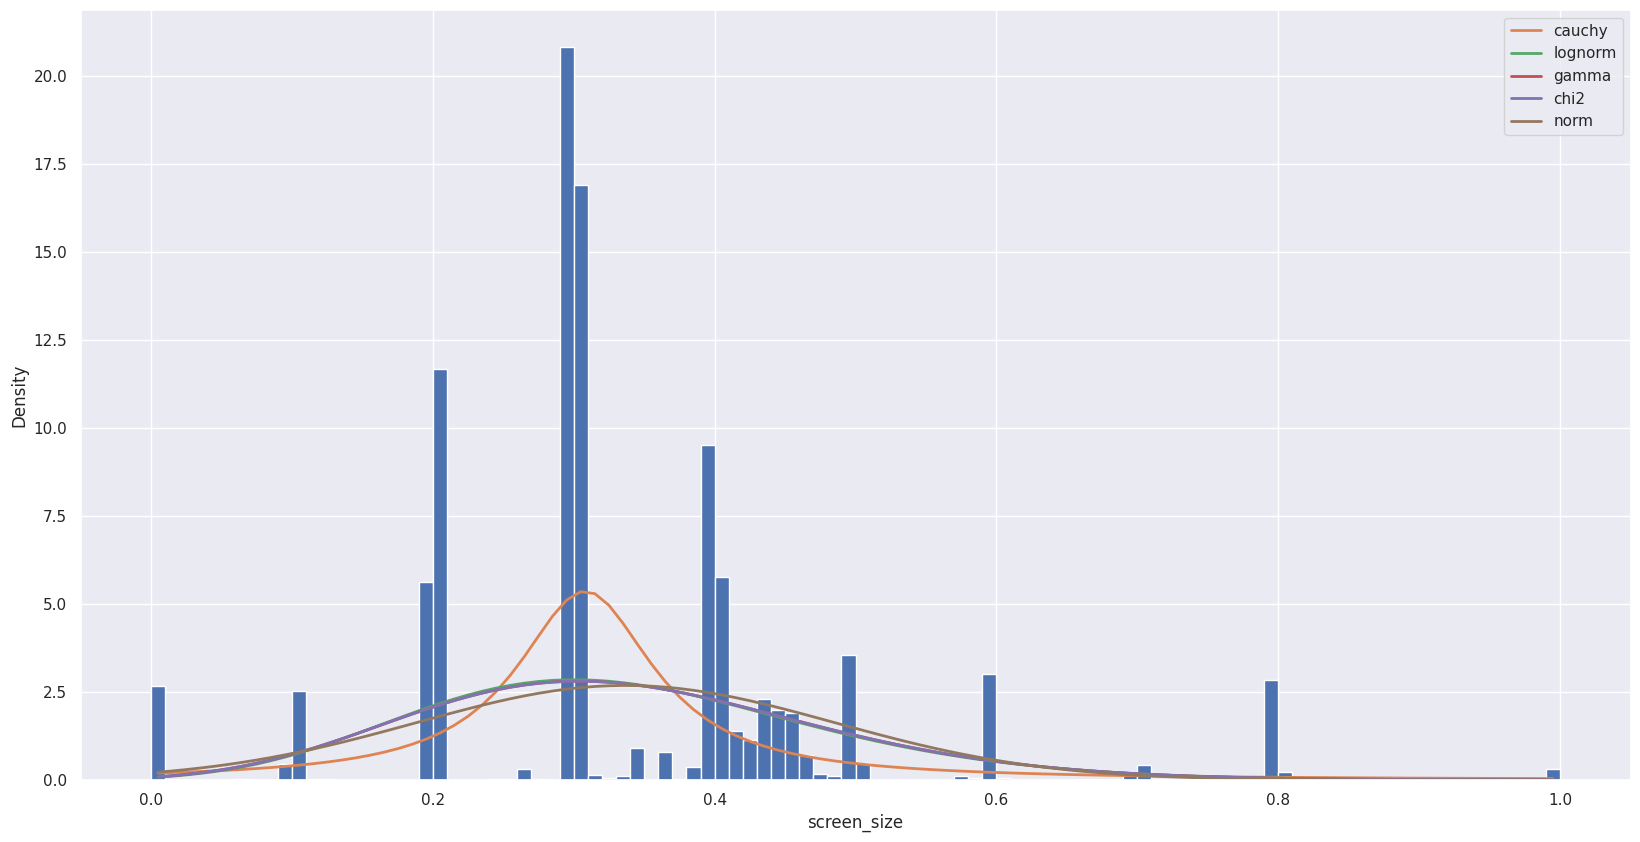

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  8.68it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
exponpow      5110.480419  175.121448  1377.582409     inf      0.464389   
chi2          5287.601079  132.748436  1495.264491     inf      0.406902   
uniform       5519.715684    4.000000  1635.506886     inf      0.676028   
expon         5548.795633   73.618694  1653.656097     inf      0.448215   
norm          5557.757081   88.119160  1659.229897     inf      0.431642   

          ks_pvalue  
exponpow        0.0  
chi2            0.0  
uniform         0.0  
expon           0.0  
norm            0.0  


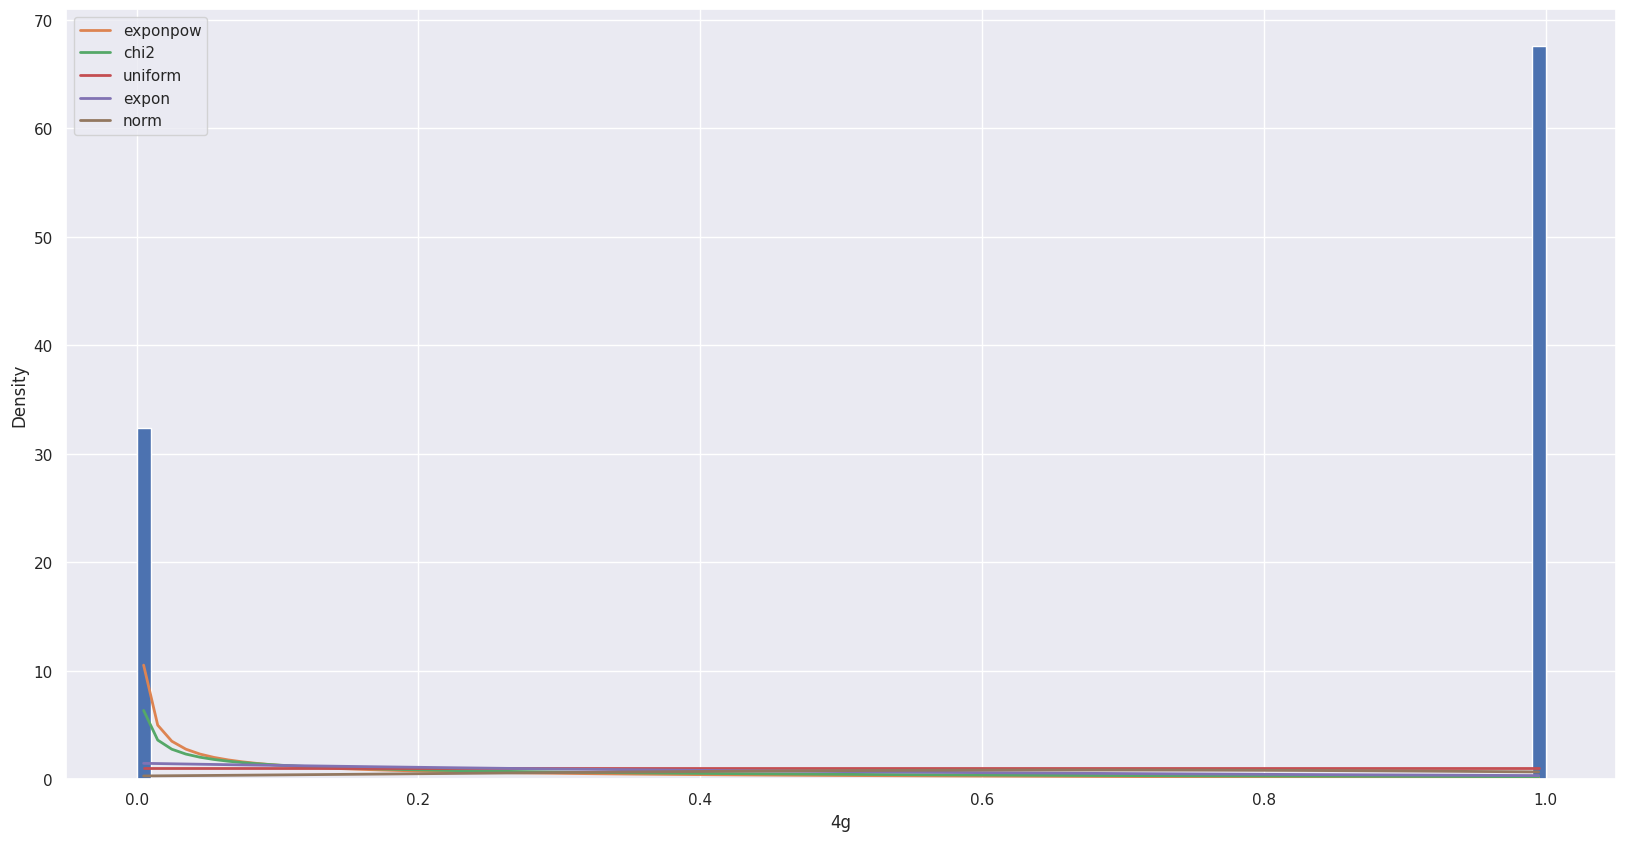

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  7.56it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
expon         6406.952412  1651.686873  2150.351017     inf      0.955993   
gamma         6540.721103   221.297812  2229.870741     inf      0.955993   
exponpow      7539.336551   133.870405  2720.638437     inf      0.955993   
chi2          8159.520954   120.630381  2993.681534     inf      0.955993   
rayleigh      8779.416796   627.002417  3238.451740     inf      0.629644   

          ks_pvalue  
expon           0.0  
gamma           0.0  
exponpow        0.0  
chi2            0.0  
rayleigh        0.0  


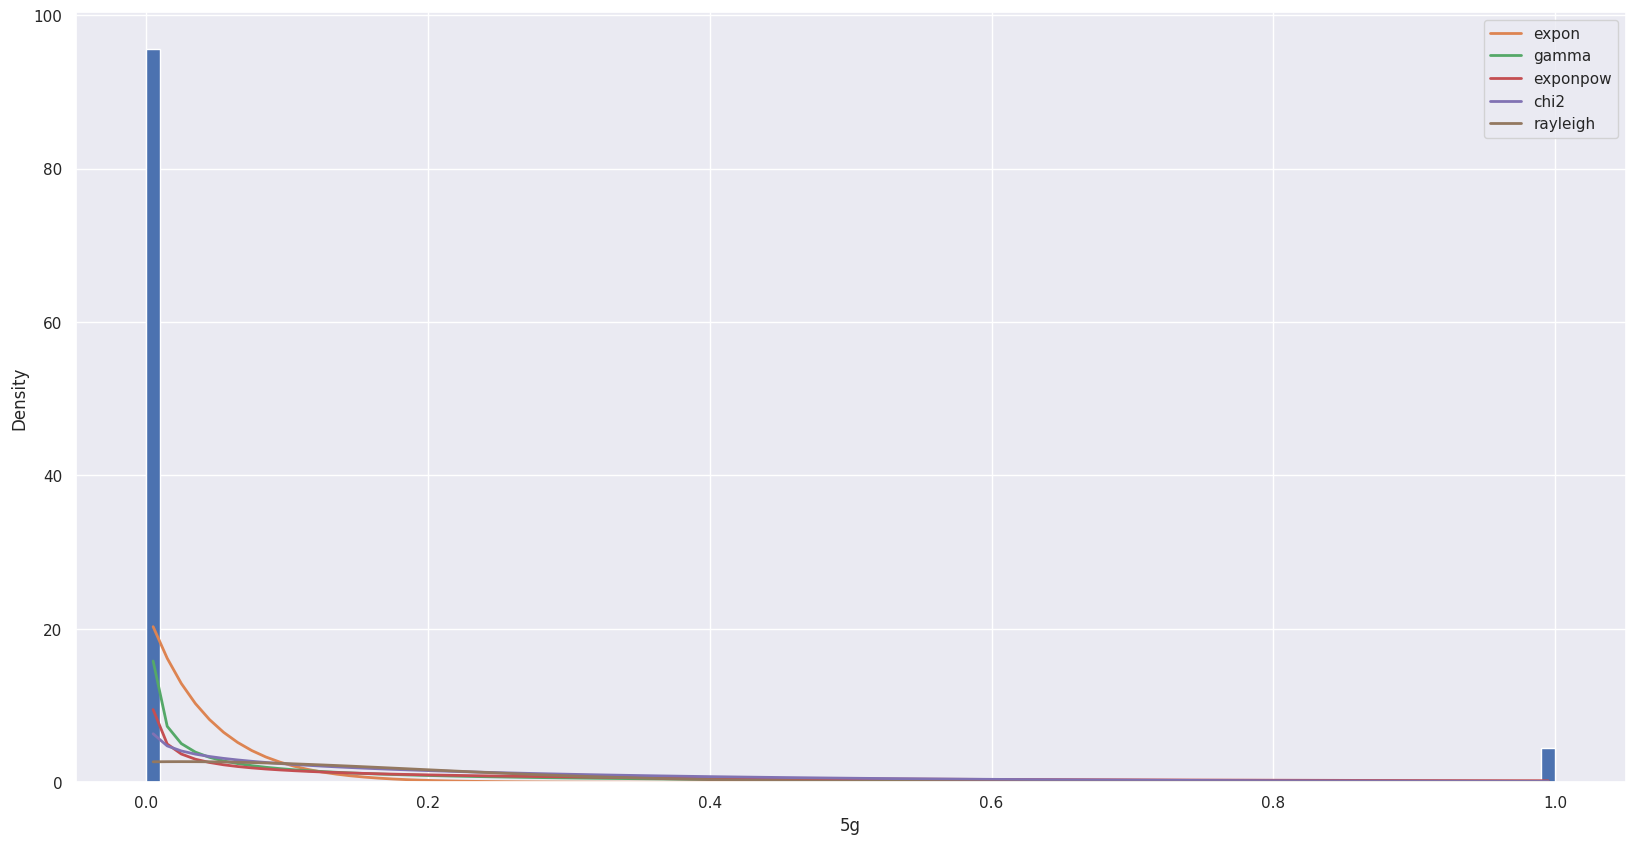

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  8.68it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
chi2          1142.783009  171.695937 -3795.911675     inf      0.423739   
exponpow      1217.415074   64.985122 -3577.400252     inf      0.186293   
gamma         1239.439770   98.069757 -3515.471207     inf      0.260190   
expon         1248.149156   68.277931 -3499.432552     inf      0.165026   
uniform       1255.986815    4.000000 -3477.811231     inf      0.214286   

              ks_pvalue  
chi2       0.000000e+00  
exponpow  2.073094e-105  
gamma     9.184189e-207  
expon      1.129021e-82  
uniform   1.111533e-139  


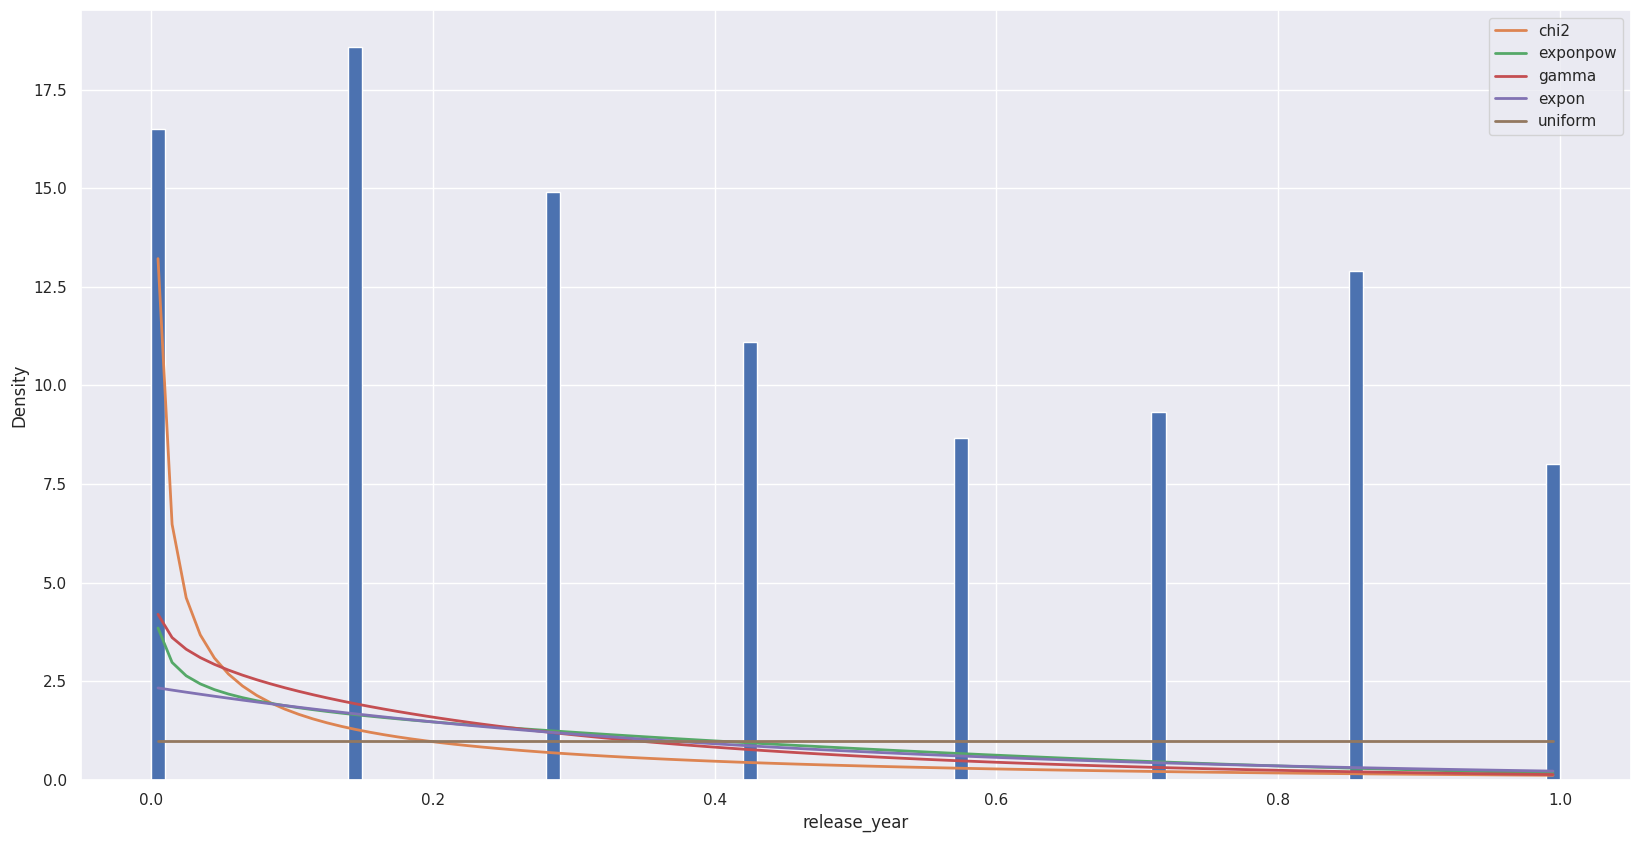

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  8.10it/s]


          sumsquare_error        aic           bic    kl_div  ks_statistic  \
exponpow        10.754714  44.315266 -19911.852912  0.060390      0.035171   
powerlaw        12.227594  20.505055 -19468.528565  0.055250      0.060804   
norm            12.742647  55.441769 -19334.166654  0.078808      0.045865   
lognorm         12.939723  57.637566 -19273.008985  0.080150      0.045797   
gamma           13.676280  57.385970 -19081.792032  0.084441      0.053927   

             ks_pvalue  
exponpow  3.793297e-04  
powerlaw  1.524930e-11  
norm      9.422425e-07  
lognorm   9.838236e-07  
gamma     3.594491e-09  


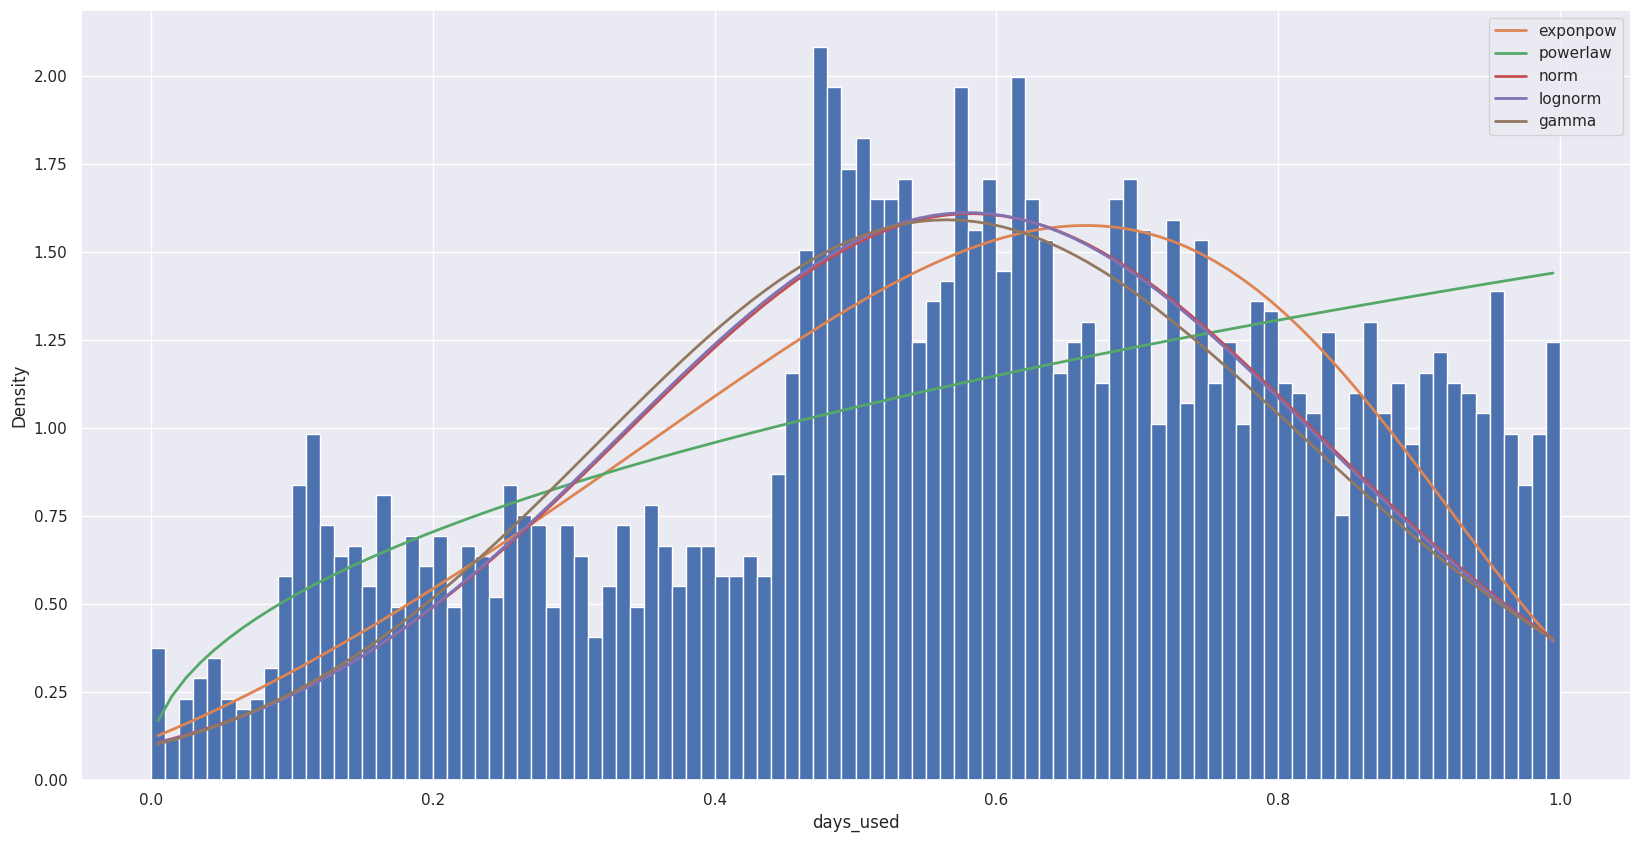

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  8.89it/s]


         sumsquare_error         aic           bic  kl_div  ks_statistic  \
norm            6.652960  401.202035 -21578.895447     inf      0.044578   
lognorm         6.802685  402.680976 -21493.877679     inf      0.044795   
chi2            9.612480  424.189878 -20299.674866     inf      0.058540   
gamma          10.418529  417.773626 -20021.546139     inf      0.061084   
cauchy         16.331824  185.489080 -18477.017826     inf      0.076041   

            ks_pvalue  
norm     2.108740e-06  
lognorm  1.843562e-06  
chi2     9.900396e-11  
gamma    1.203900e-11  
cauchy   8.133277e-18  


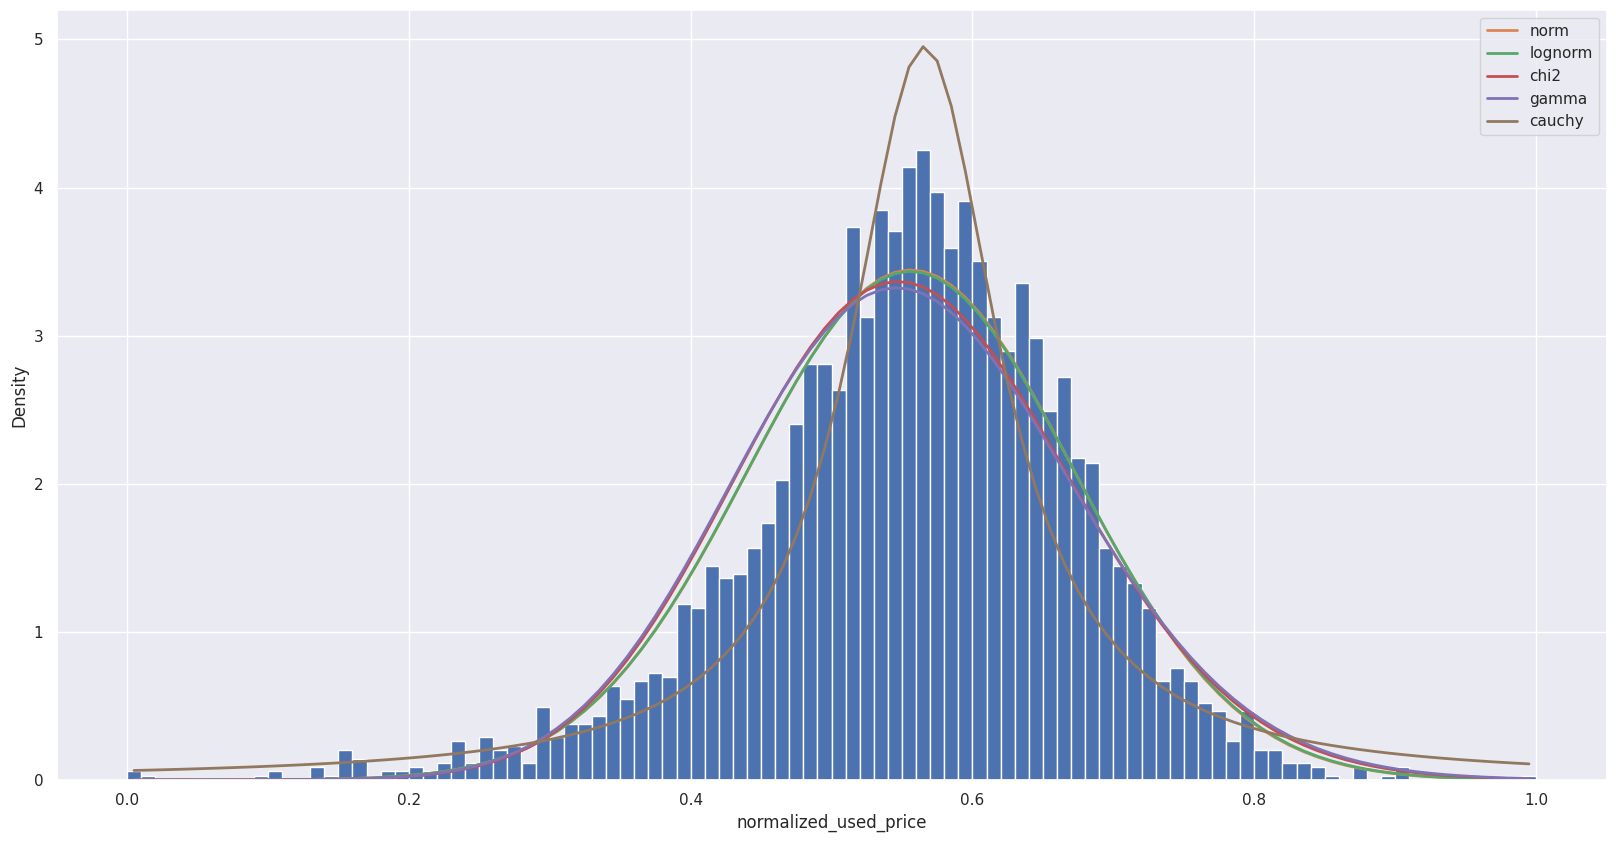

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  5.93it/s]


          sumsquare_error         aic           bic  kl_div  ks_statistic  \
norm            55.783432  232.594078 -14234.257808     inf      0.029240   
lognorm         55.795613  234.151102 -14225.356412     inf      0.027569   
gamma           55.923928  229.838193 -14217.422246     inf      0.028933   
chi2            56.614747  223.032659 -14175.016921     inf      0.040299   
exponpow        69.550409  326.525421 -13464.244859     inf      0.086573   

             ks_pvalue  
norm      5.336975e-03  
lognorm   1.029395e-02  
gamma     6.037389e-03  
chi2      2.604388e-05  
exponpow  5.679400e-23  


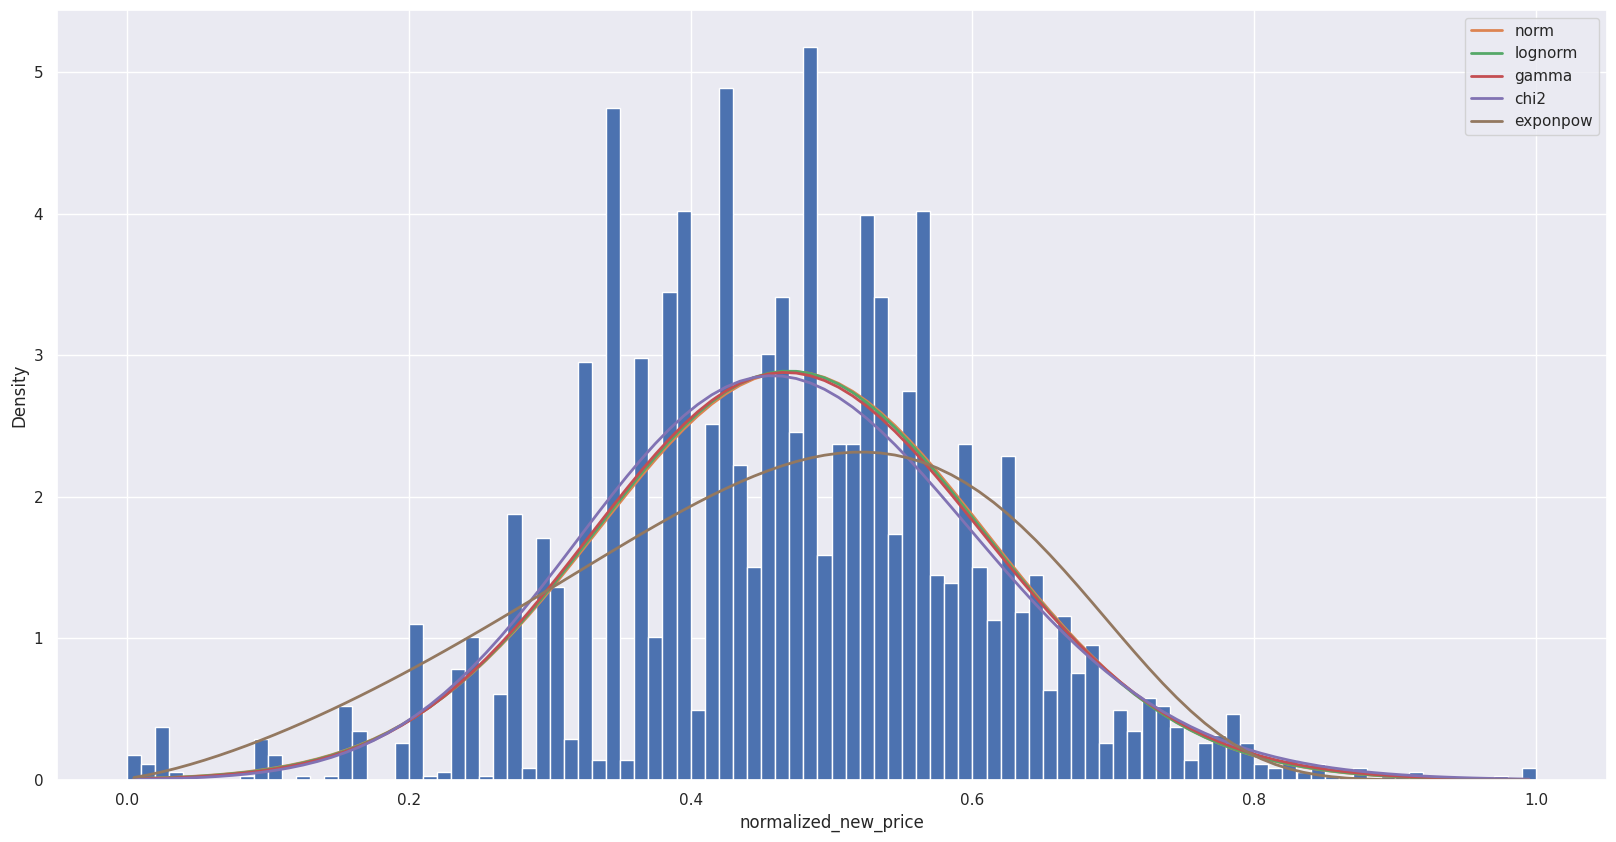

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  9.19it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
norm          1688.674637  1562.284854 -2455.349819     inf      0.164206   
gamma         1693.388991   842.517347 -2437.573269     inf      0.169252   
lognorm       1693.534709   810.459570 -2437.276060     inf      0.170131   
rayleigh      1698.248194   810.120947 -2435.823449     inf      0.170492   
exponpow      1718.461546  1425.830527 -2386.807760     inf      0.188340   

              ks_pvalue  
norm       7.466326e-82  
gamma      5.750890e-87  
lognorm    7.129059e-88  
rayleigh   3.013564e-88  
exponpow  9.507026e-108  


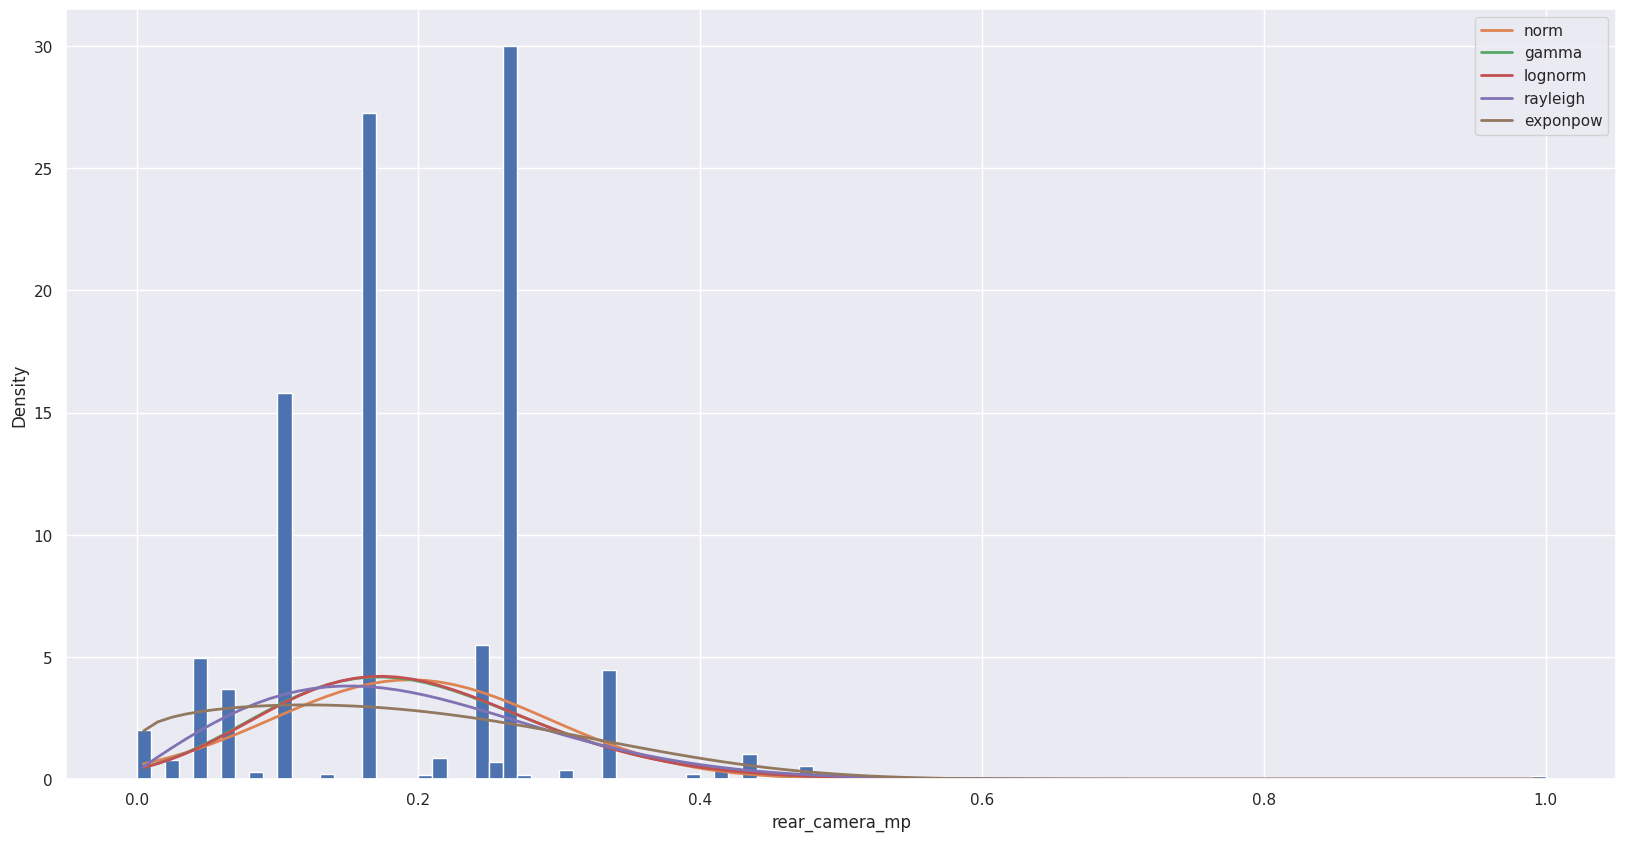

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  7.88it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
exponpow      1135.369796  177.602934 -3818.390700     inf      0.122033   
gamma         1146.546265  165.856198 -3784.556124     inf      0.144363   
powerlaw      1149.681959  290.424625 -3775.122658     inf      0.620916   
chi2          1152.784454  182.026148 -3765.814359     inf      0.156619   
expon         1177.905565  175.148873 -3699.501572     inf      0.127257   

             ks_pvalue  
exponpow  2.766324e-45  
gamma     2.789942e-63  
powerlaw  0.000000e+00  
chi2      1.831845e-74  
expon     3.208307e-49  


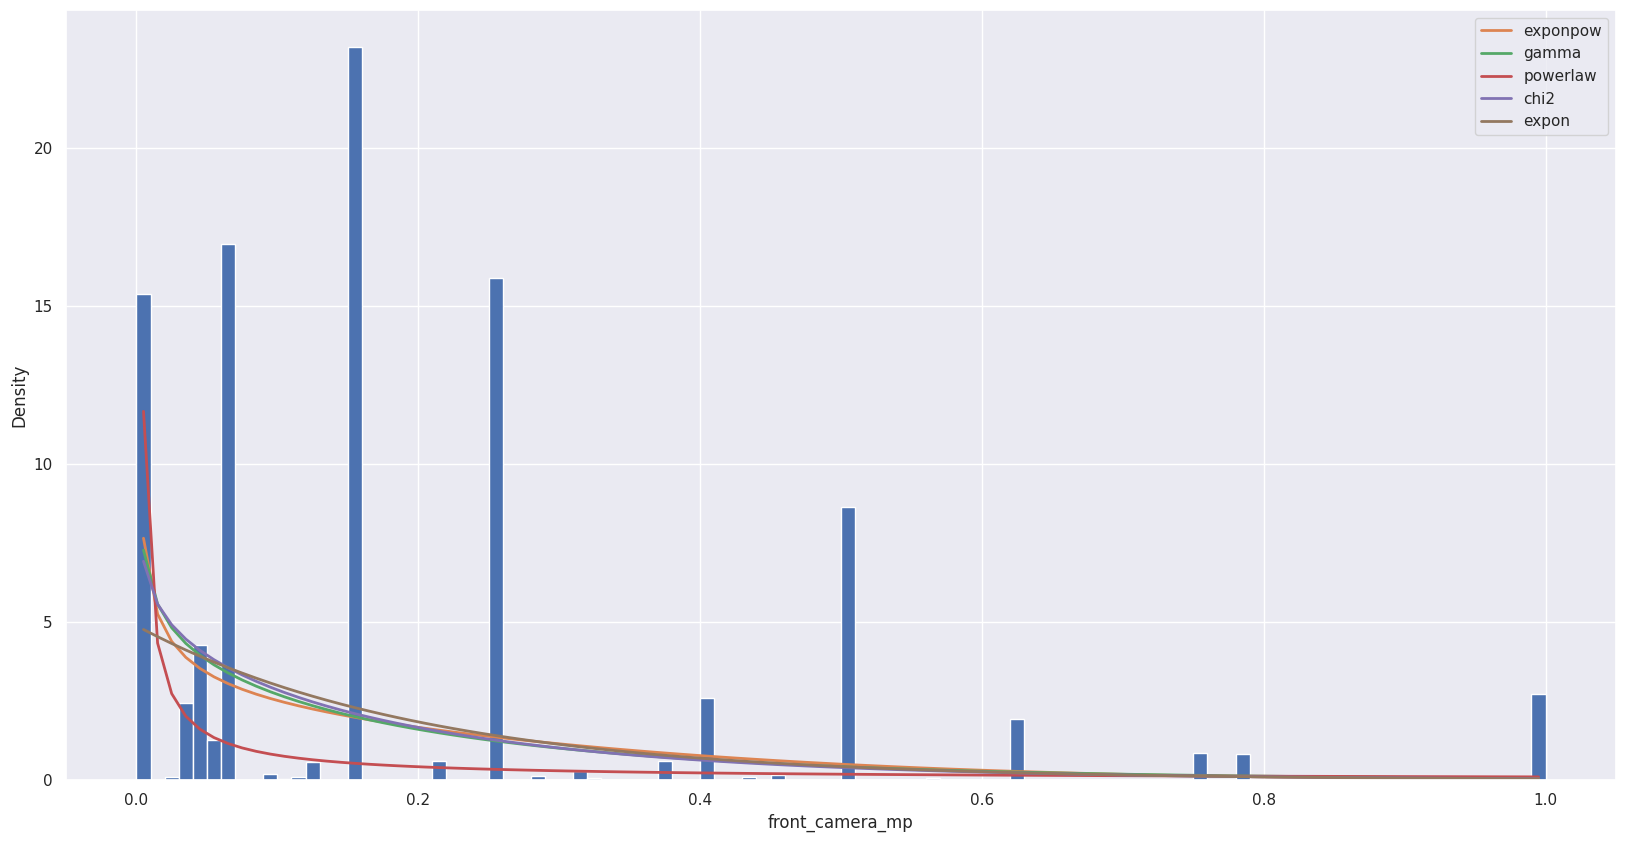

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  9.60it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm       1406.396667   848.877316 -3078.984393     inf      0.231400   
chi2          1678.920337  1396.998830 -2467.211733     inf      0.274635   
expon         1715.952641  1295.090813 -2400.001474     inf      0.261209   
cauchy        1772.403453   683.694325 -2288.202035     inf      0.273073   
rayleigh      2027.419673  3571.462896 -1823.889868     inf      0.387429   

              ks_pvalue  
lognorm   4.284734e-163  
chi2      9.987576e-231  
expon     2.077144e-208  
cauchy    4.542912e-228  
rayleigh   0.000000e+00  


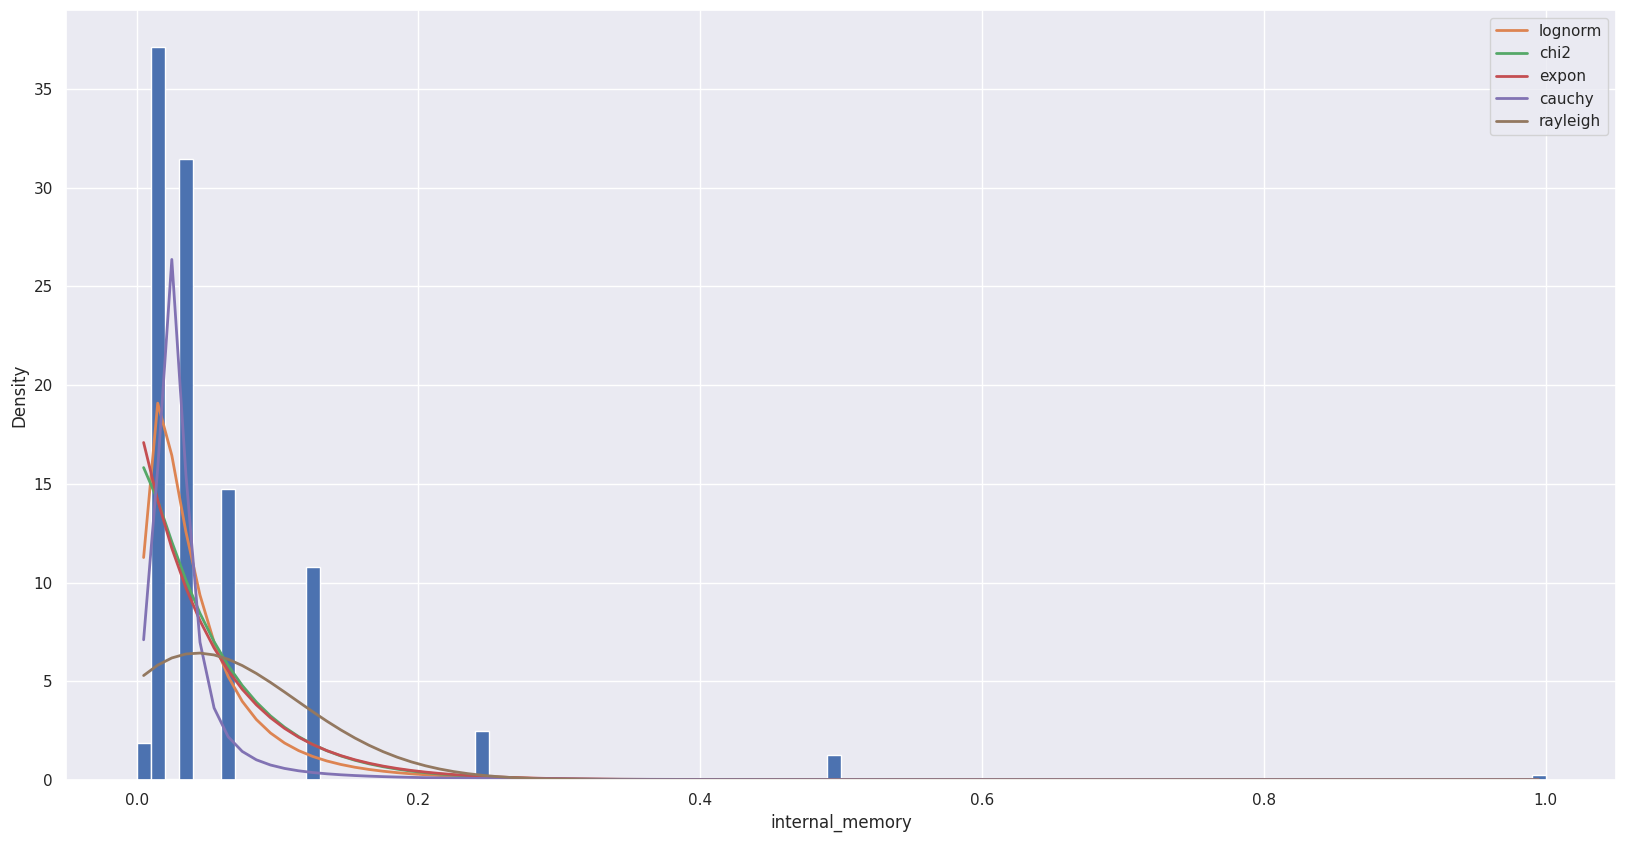

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  5.86it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
lognorm       6356.216122  490.903629  2131.037402     inf      0.409521   
gamma         6357.075472  507.652093  2131.504345     inf      0.410870   
chi2          6358.024277  495.044992  2132.019822     inf      0.409264   
norm          6360.177712  605.298240  2125.042191     inf      0.423116   
exponpow      6494.429786  380.421922  2205.338477     inf      0.431356   

          ks_pvalue  
lognorm         0.0  
gamma           0.0  
chi2            0.0  
norm            0.0  
exponpow        0.0  


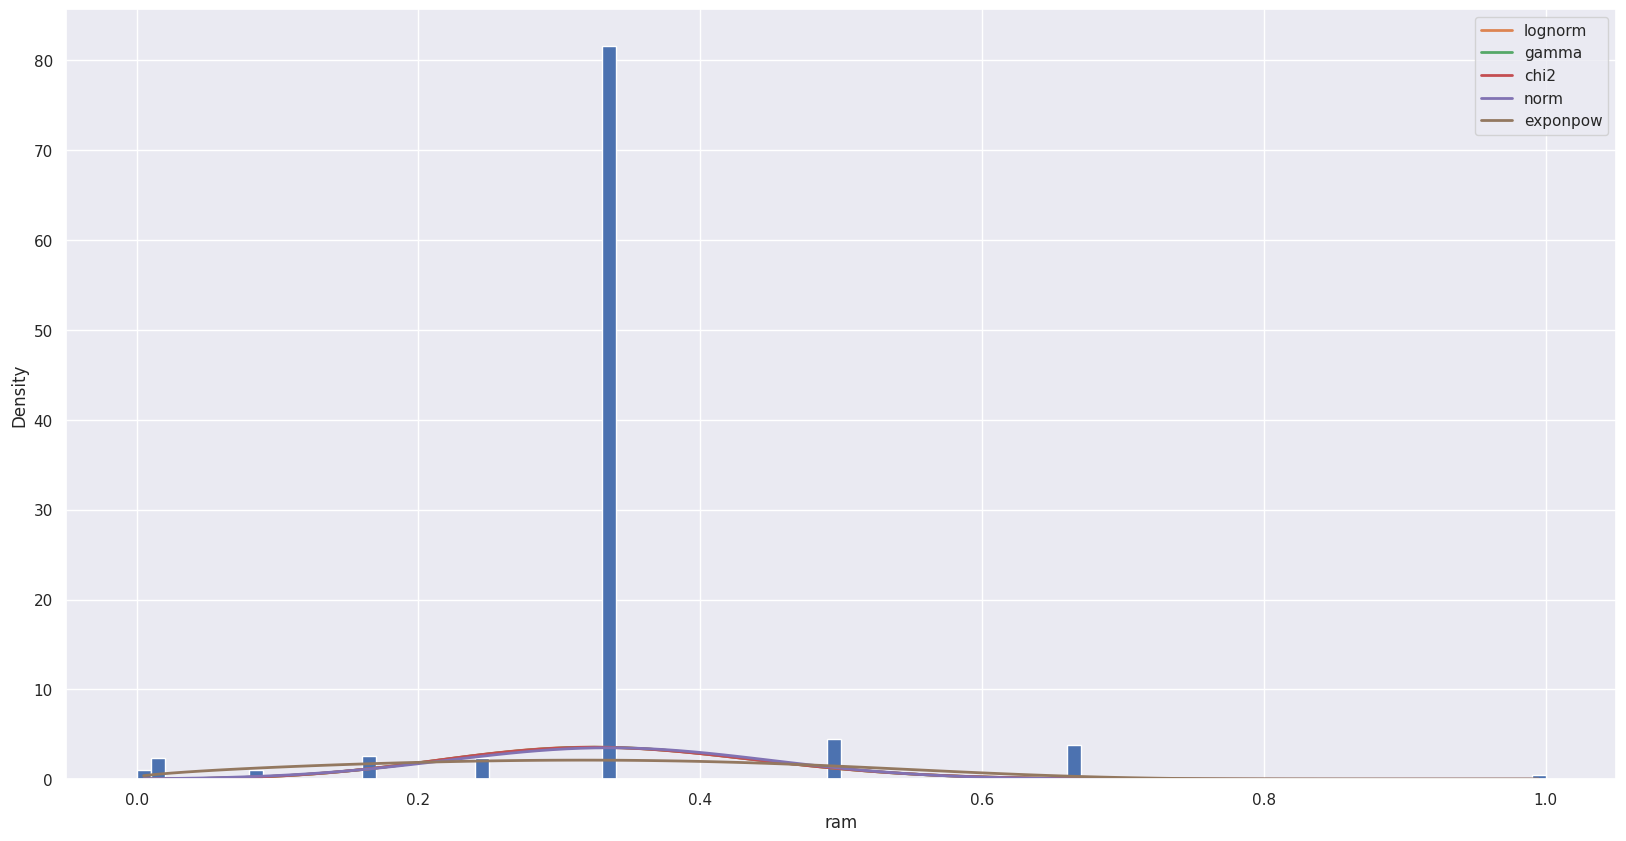

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 12.19it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
gamma          223.571621  270.341854 -9431.078096     inf      0.066973   
lognorm        224.091671  246.903998 -9423.053080     inf      0.075871   
rayleigh       230.271583  263.901878 -9337.237072     inf      0.085639   
norm           232.311437  447.728165 -9306.774647     inf      0.092415   
cauchy         246.523184  206.660141 -9101.685900     inf      0.112268   

             ks_pvalue  
gamma     6.492724e-14  
lognorm   9.729352e-18  
rayleigh  1.733027e-22  
norm      4.024693e-26  
cauchy    2.242139e-38  


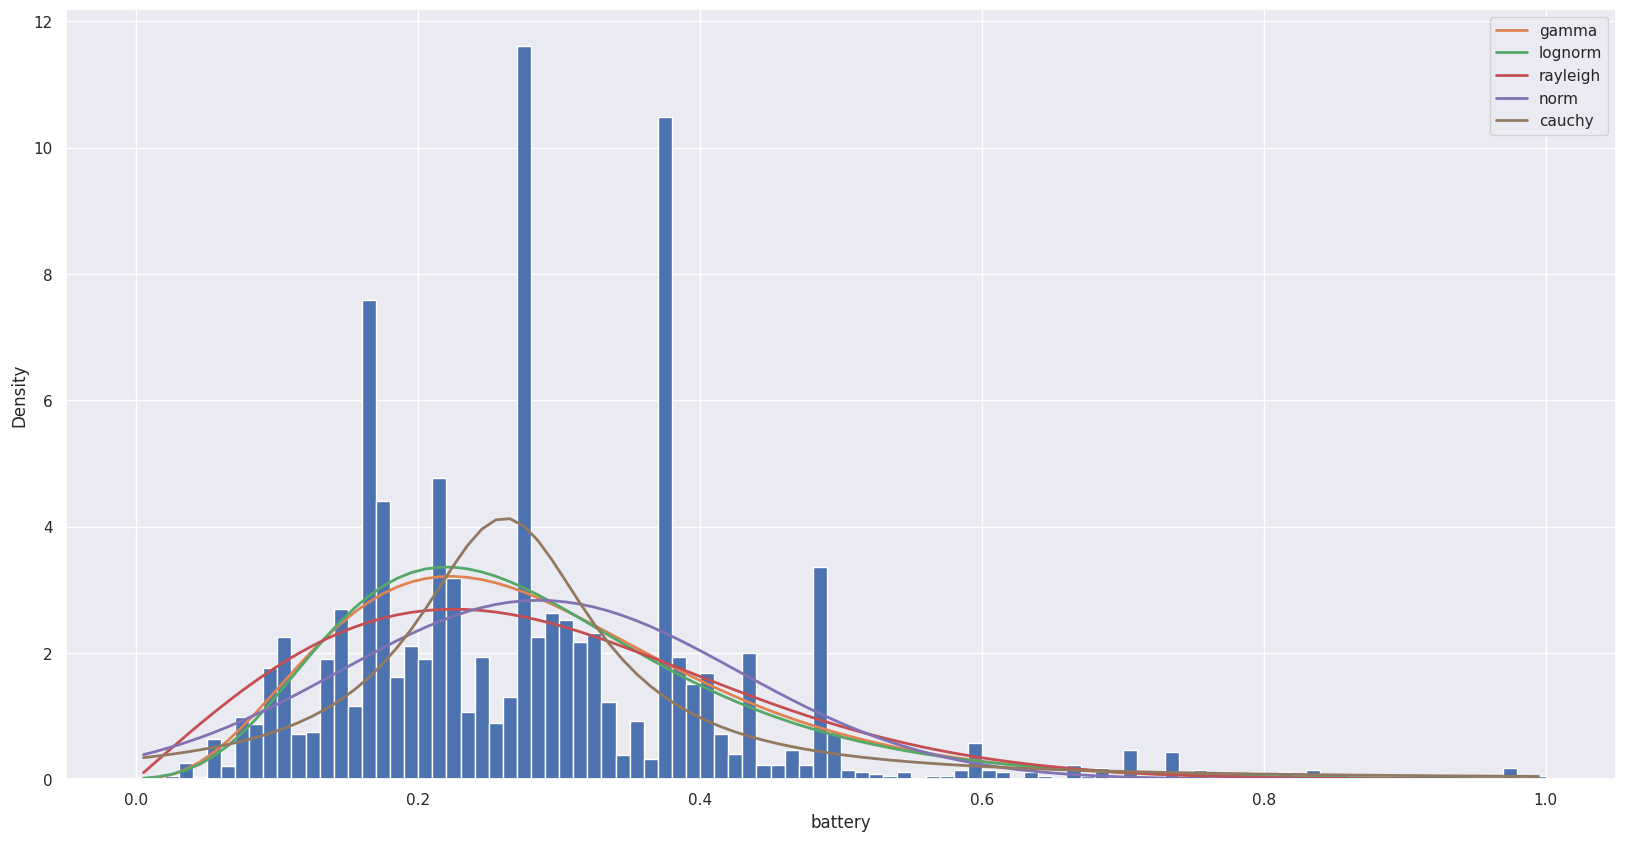

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  8.59it/s]


          sumsquare_error          aic           bic  kl_div  ks_statistic  \
cauchy          32.555299   461.517660 -16094.363739     inf      0.090017   
lognorm        126.005588   592.984242 -11411.620898     inf      0.125325   
chi2           173.295481   787.461330 -10310.928270     inf      0.170081   
rayleigh       252.974285  1264.235398  -9012.462852     inf      0.266924   
norm           321.624994  1410.656163  -8183.162959     inf      0.259955   

              ks_pvalue  
cauchy     8.368630e-25  
lognorm    9.565645e-48  
chi2       8.024587e-88  
rayleigh  9.188114e-218  
norm      2.193907e-206  


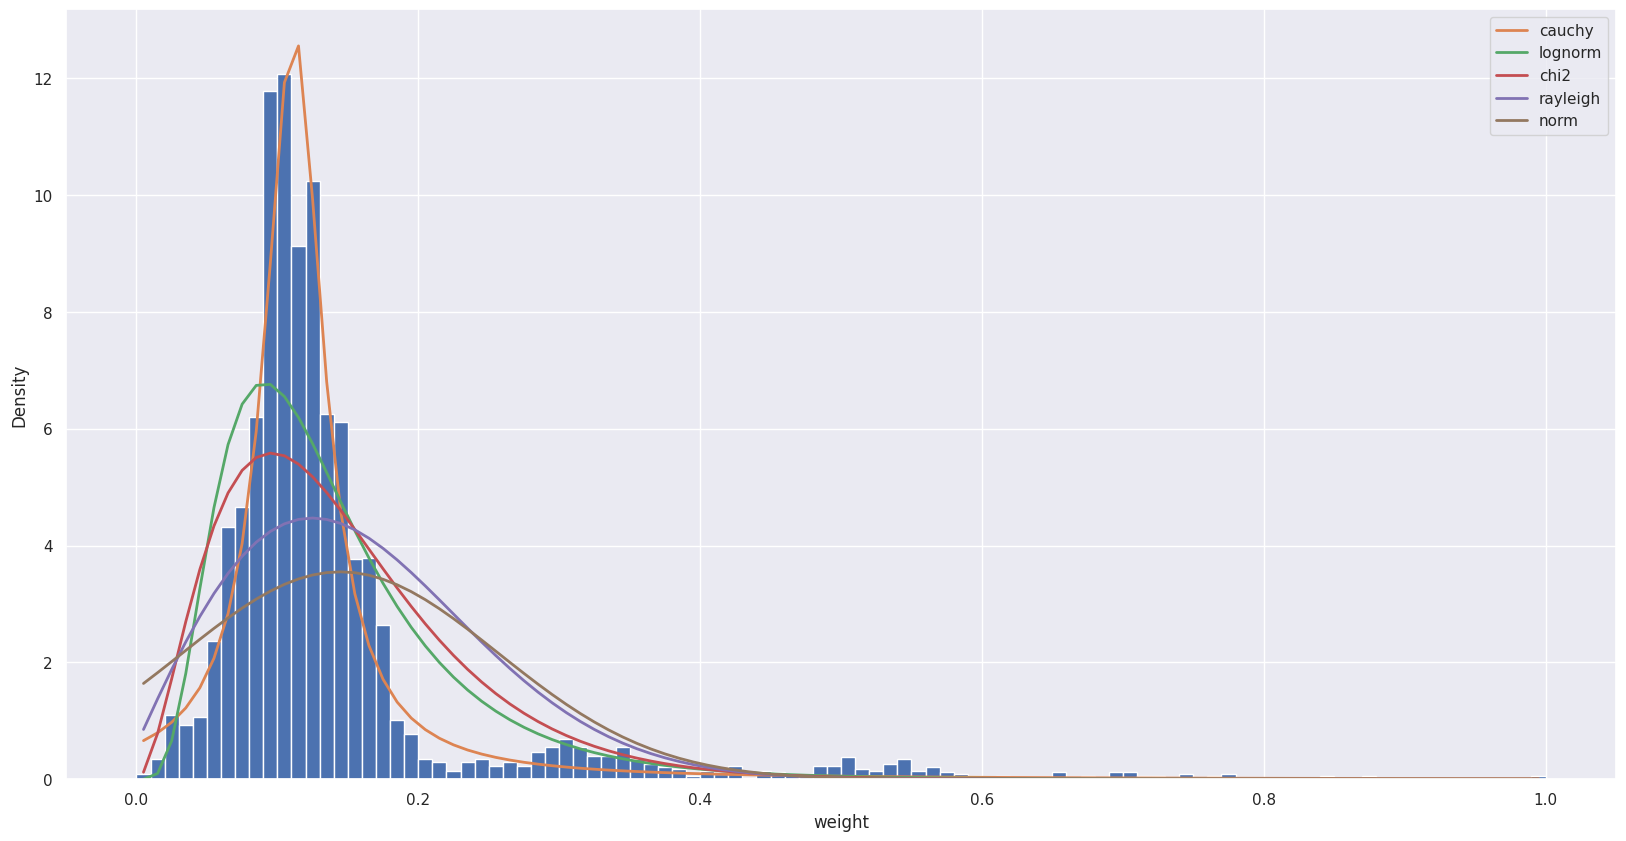

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  9.06it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
norm           535.128524  254.228060 -6424.660066     inf      0.123981   
lognorm        535.299194  256.553857 -6415.411358     inf      0.125173   
exponpow       538.085133  162.719345 -6397.481799     inf      0.135876   
gamma          538.668957  267.773207 -6393.736229     inf      0.143608   
chi2           538.886596  266.492752 -6392.340984     inf      0.142130   

             ks_pvalue  
norm      9.850073e-47  
lognorm   1.247211e-47  
exponpow  4.434343e-56  
gamma     1.273147e-62  
chi2      2.417568e-61  


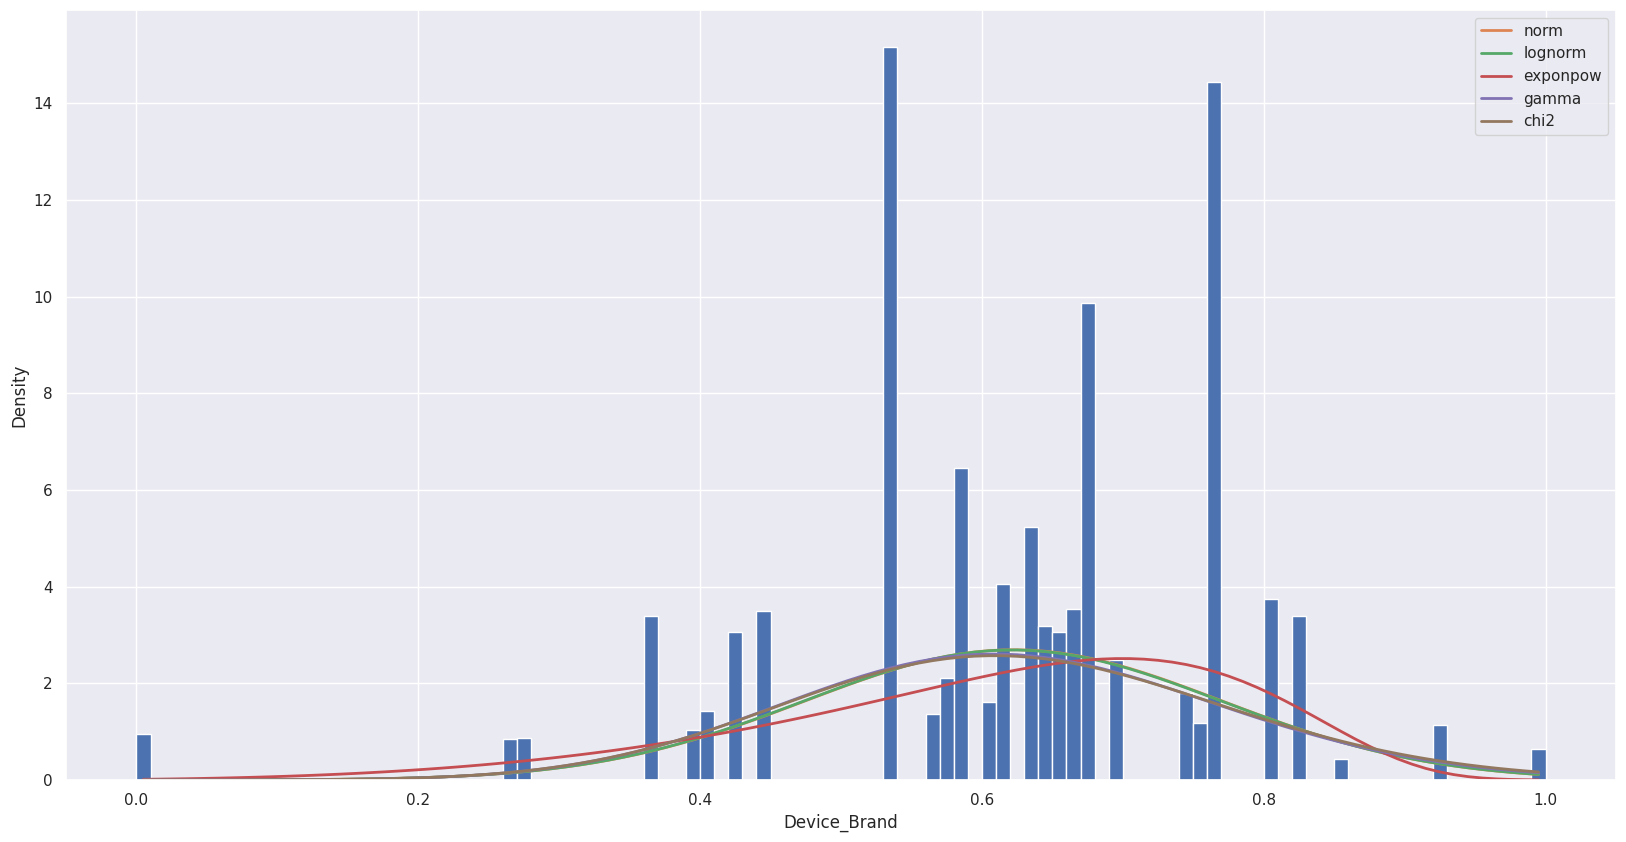

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  7.46it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
exponpow      7651.869485  953.774667  2771.812236     inf      0.641467   
norm          8496.256945  329.452879  3125.214857     inf      0.538190   
lognorm       8496.472140  331.710946  3133.449627     inf      0.537691   
chi2          8516.323942  303.651247  3141.510402     inf      0.541177   
uniform       8606.869237    4.000000  3169.892091     inf      0.930515   

          ks_pvalue  
exponpow        0.0  
norm            0.0  
lognorm         0.0  
chi2            0.0  
uniform         0.0  


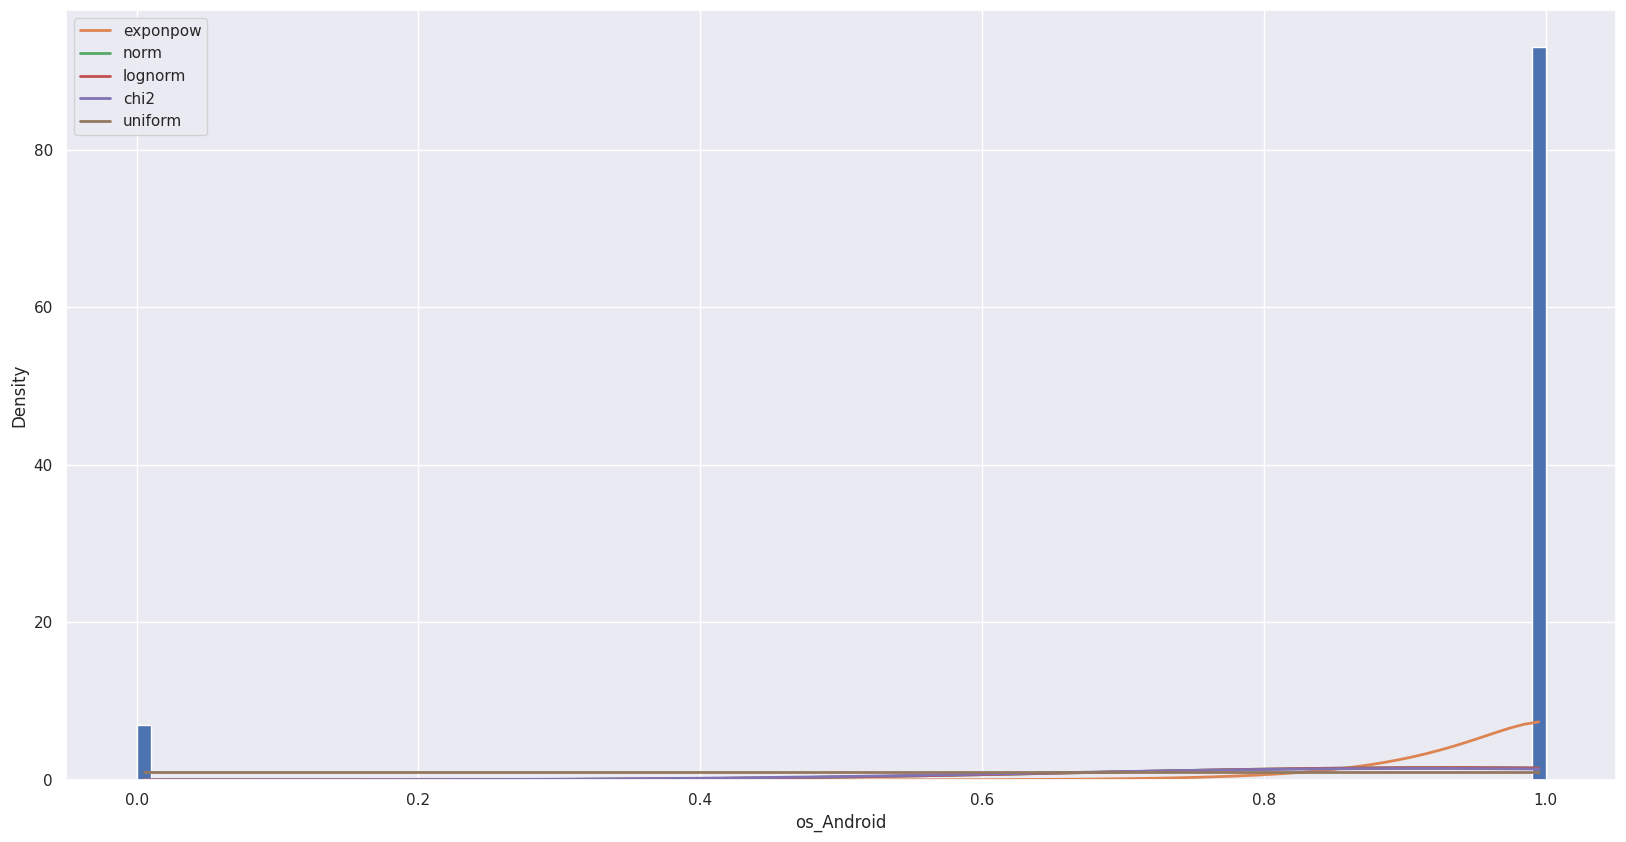

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  7.41it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
expon         6216.683859  1879.706417  2046.222960     inf      0.960336   
gamma         6501.084948   242.079767  2208.876148     inf      0.960336   
exponpow      7579.764500   133.922024  2739.110232     inf      0.960336   
chi2          8198.119029   127.438510  3009.981929     inf      0.960336   
lognorm       8560.007021   932.686448  3159.181843     inf      0.960303   

          ks_pvalue  
expon           0.0  
gamma           0.0  
exponpow        0.0  
chi2            0.0  
lognorm         0.0  


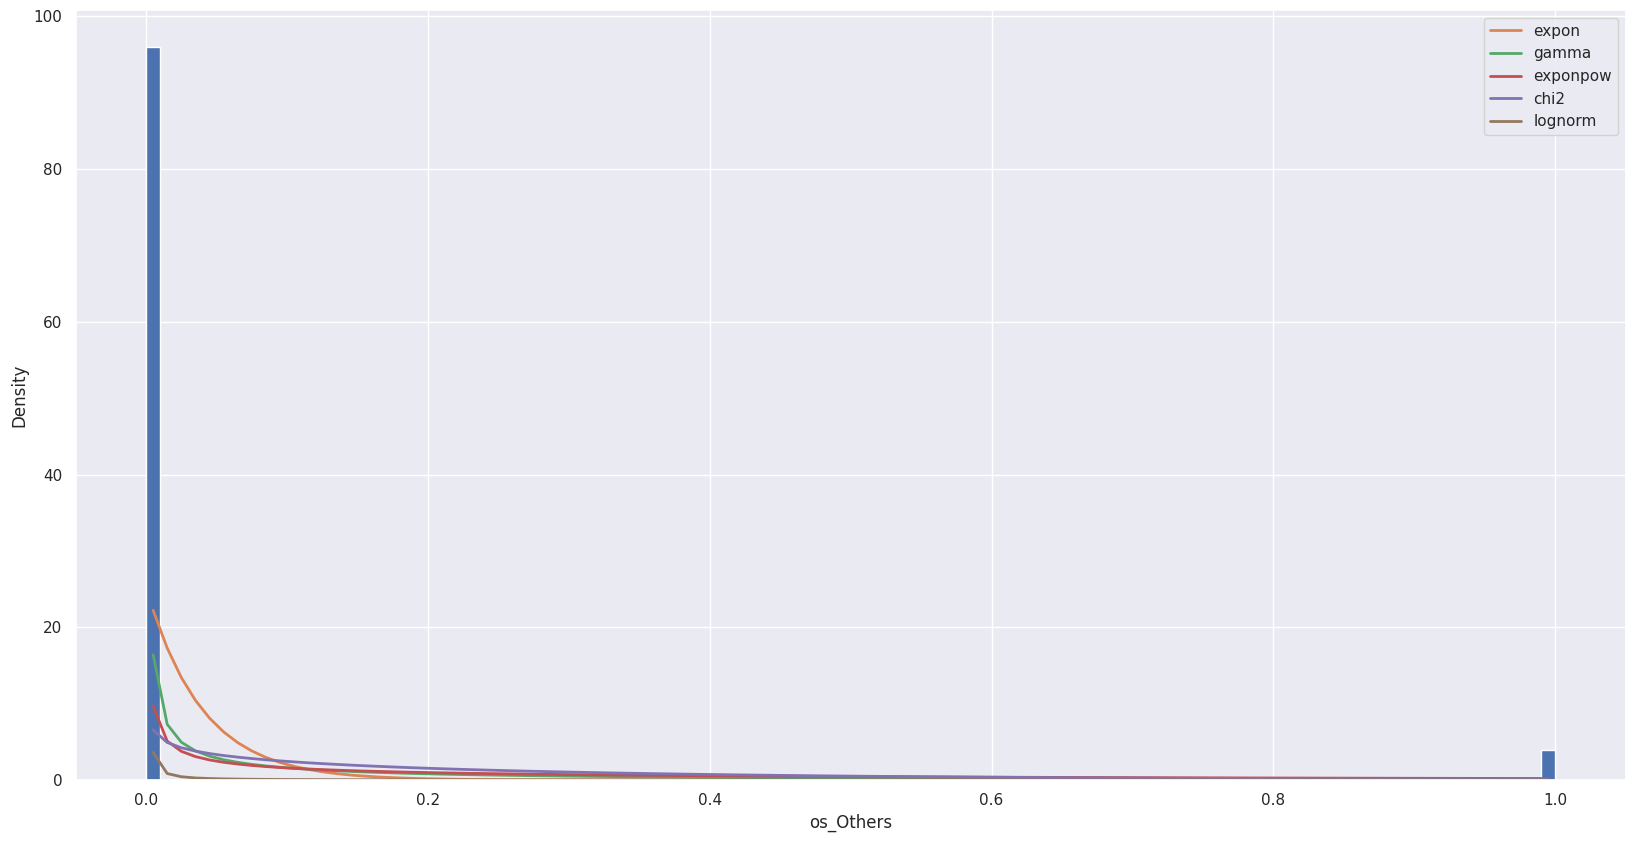

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  9.48it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
expon         4273.303073  4370.704753   751.492644     inf      0.980602   
gamma         7033.148161   387.001484  2480.586252     inf      0.980414   
exponpow      7126.412329   252.991168  2526.087536     inf      0.980602   
chi2          8260.397933   197.696579  3036.121874     inf      0.980602   
rayleigh      9003.120992  1608.055371  3325.358915     inf      0.630882   

          ks_pvalue  
expon           0.0  
gamma           0.0  
exponpow        0.0  
chi2            0.0  
rayleigh        0.0  


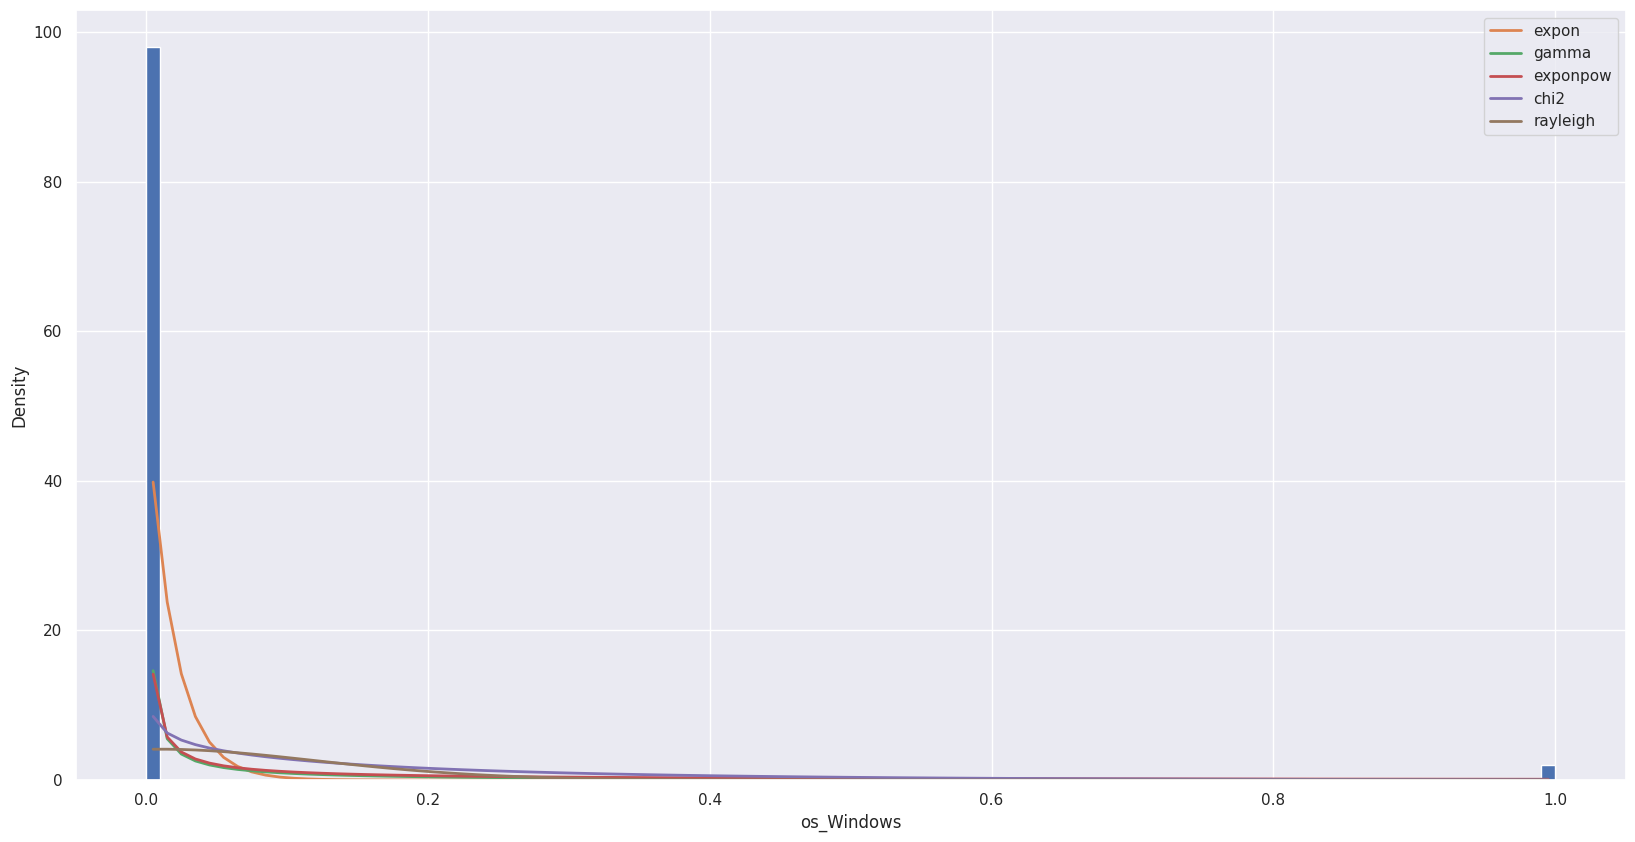

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  7.70it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
expon         2173.699263  8685.690580 -1583.261576     inf      0.989577   
exponpow      7538.990360   375.293081  2720.479832     inf      0.989411   
gamma         7949.794613   513.406722  2903.741560     inf      0.980827   
chi2          8095.962274   301.420168  2966.671226     inf      0.989577   
rayleigh      8923.853447  3151.717760  3294.813672     inf      0.627874   

          ks_pvalue  
expon           0.0  
exponpow        0.0  
gamma           0.0  
chi2            0.0  
rayleigh        0.0  


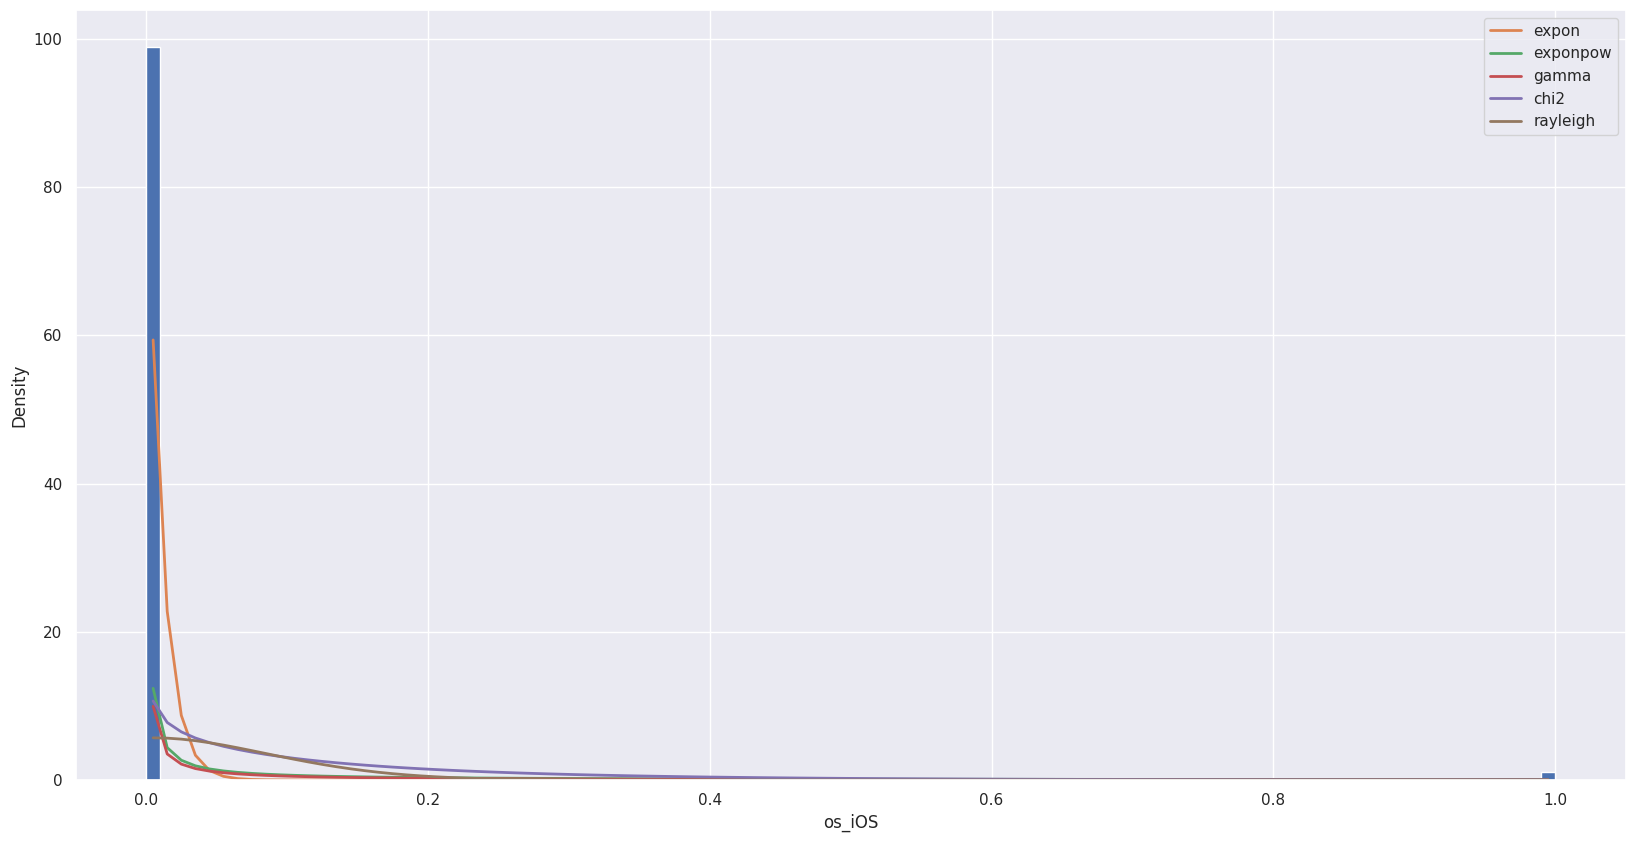

In [167]:
import matplotlib.pyplot as plt
from fitter import Fitter
plt.rcParams["figure.figsize"] = (20, 10)

for i in udd_df_imputed_scaled.columns:
    values = udd_df_imputed_scaled[i].values
    f = Fitter(values, distributions=get_common_distributions())
    f.fit()
    print(f.summary())
    plt.ylabel("Density")
    plt.xlabel(i)
    plt.show()


# **HEATMAP TO UNDERSTAND CORRELATION**
A heatmap is a useful tool for understanding the correlation between pairs of variables in a dataset. It can help identify patterns, relationships, and dependencies between features, and can guide the selection of appropriate machine learning algorithms and models for analyzing the data. 



<Axes: >

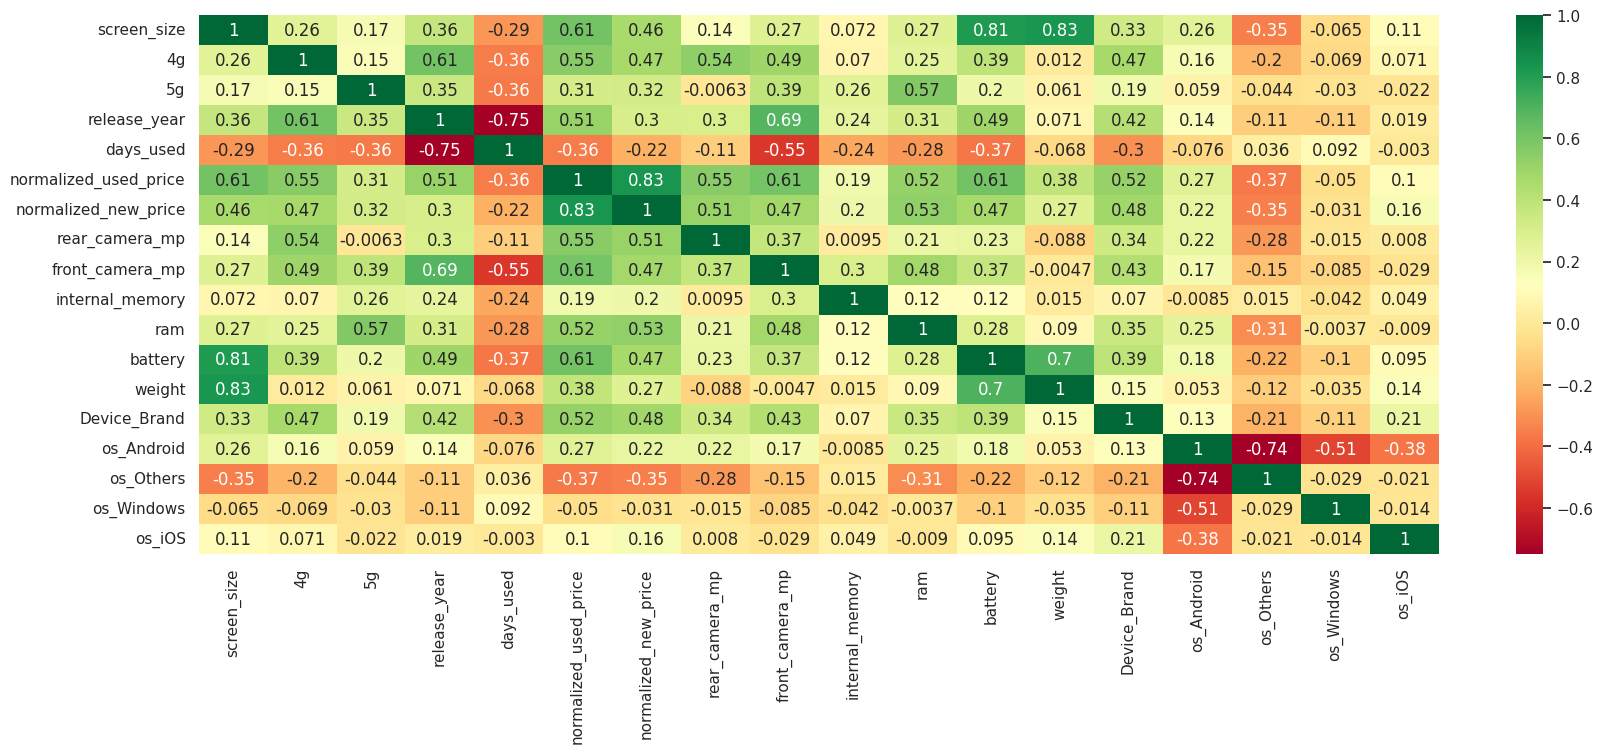

In [168]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(udd_df_imputed_scaled.corr(), annot=True, cmap='RdYlGn')

From the above heatmap we can see that, 'normalized_used_price' has a roughly linear relationship with 'normalized_new_price'

By examining the scatter plots, it is possible to identify patterns and relationships between pairs of variables. For example, if a linear relationship is observed between two variables, this may suggest that they are highly correlated and could be combined in a machine learning model.

Additionally, the distribution of each variable can be analyzed using the histograms on the diagonal of the matrix. This can help identify any potential issues with the data, such as skewness or outliers.

In [ ]:
# All attributes are plotted against each other to see the pattern of distribution
sns.pairplot(udd_df_imputed_scaled)

# **Feature Importance and Selection**

Lets fit a very simple linear model to understand how the features of a device  are affecting its normalized_used_price

In [ ]:
column_names = udd_df_imputed_scaled.columns.tolist()

print(column_names)

In [ ]:
udd_df_imputed_scaled = udd_df_imputed_scaled.rename(columns={'4g': 'g4'})
udd_df_imputed_scaled = udd_df_imputed_scaled.rename(columns={'5g': 'g5'})

In [ ]:
import statsmodels.formula.api as smf  # OLS model Library

results = smf.ols('normalized_used_price ~ screen_size + g4 + g5 + release_year + days_used + normalized_new_price + rear_camera_mp + front_camera_mp + internal_memory + ram + battery + weight + Device_Brand + os_Android + os_Others + os_Windows + os_iOS', data=udd_df_imputed_scaled).fit()

# Print out the statistics
print(results.summary())


# **Feature Selection**

Based on the  summary table, the following variables are statistically significant at the alpha level of 0.05:


screen_size
g4
release_year
normalized_new_price
rear_camera_mp
front_camera_mp
ram
weight
Device_Brand
os_Android
os_Others
os_Windows
os_iOS
The variables with p-values greater than 0.05 (days_used, internal_memory, and battery) are not considered statistically significant at the chosen alpha level.



# **Null-Hypothesis**
In statistical hypothesis testing, the null hypothesis is a statement or assumption that there is no significant difference between two groups or variables. The null hypothesis is typically denoted by H0.

The purpose of the null hypothesis is to test whether an observed effect or relationship in a dataset is statistically significant or can be explained by chance. For example, if we were testing whether a new drug is more effective than an existing treatment, the null hypothesis would be that there is no significant difference in the effectiveness of the two treatments.

To test the null hypothesis, we typically use a statistical test such as a t-test or ANOVA. The test calculates a p-value, which represents the probability of observing the effect or relationship in the data if the null hypothesis is true. If the p-value is below a pre-defined significance level (e.g., 0.05), we reject the null hypothesis and conclude that the observed effect or relationship is statistically significant.

In summary, the null hypothesis is a statement that assumes there is no significant difference between groups or variables, and is used in statistical hypothesis testing to determine the statistical significance of an observed effect or relationship.

**P-Value -**
The p-value is a statistical measure used to determine the level of significance of a result in a statistical hypothesis test. It represents the probability of observing a test statistic as extreme as the one computed from the sample data, assuming the null hypothesis is true.

In hypothesis testing, the null hypothesis assumes that there is no significant difference between two groups or variables. The alternative hypothesis, on the other hand, assumes that there is a significant difference between the groups or variables being tested.

After performing a statistical test, the p-value is compared to a pre-defined significance level, typically 0.05 or 0.01. If the p-value is less than the significance level, we reject the null hypothesis and conclude that there is a significant difference between the groups or variables being tested. If the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that there is insufficient evidence to suggest a significant difference.

In the context of finding significant features, the p-value can be used to determine the importance of individual features in a machine learning model. For example, in a linear regression model, the p-value for each feature can be used to determine which features have a significant impact on the outcome variable. Features with p-values below the significance level can be considered significant and included in the final model, while those with p-values above the significance level can be excluded.

Overall, the p-value is an important statistical measure that helps in determining the significance of a result in a statistical hypothesis test and can be used to identify significant features in a machine learning model.


**Lets consider only these features and calculate the model fit again, and then lets have a comparative analysis of both models.**

In [ ]:
df_norm_feature_selected = udd_df_imputed_scaled[
    [
        "screen_size",
"g4",
"release_year",
"normalized_new_price",
"rear_camera_mp",
"front_camera_mp",
"ram",
"weight",
"Device_Brand",
"os_Android",
"os_Others",
"os_Windows",
"os_iOS"
    ]
]

In [ ]:
results2 = smf.ols(
    'normalized_used_price ~ screen_size + g4 + release_year +  normalized_new_price + rear_camera_mp + front_camera_mp + ram + weight + Device_Brand + os_Android + os_Others + os_Windows + os_iOS', data=udd_df_imputed_scaled).fit()
print(results2.summary())  # OLS Linear Model Summary

Based on the p-values in the "P>|t|" column, the significant variables in the model are:

screen_size

g4

release_year

normalized_new_price

rear_camera_mp

front_camera_mp

ram

weight

Device_Brand

os_Android

os_Others

os_Windows

os_iOS

All of these variables have a p-value less than 0.05, which indicates that they are statistically significant in explaining the variation in the dependent variable "normalized_used_price".


From the above two summaries we can interpret that after selecting only the significant features(features with P value less than 0.05) it had little to no effect on the outcome compare to the model which uses all the features.

Both the models have almost the same Adjusted R-squared value, which means that both models are performing almost equally well in terms of explaining the variance in the dependent variable. However, Model2 has a higher F-statistic, which means that the overall fit of the model is better than Model1. Moreover, Model2 has fewer predictors (only 12) as compared to Model1 (16), which means that Model2 has better model parsimony. Model2 may be preferred over Model1 due to its simplicity and still having high predictive power.Hence, based on these criteria, one can conclude that Model2 is performing slightly better than Model1.

**From the above studies let's stick to the data with all featues - MODEL 1and try using different models**

In [ ]:
X = udd_df_imputed_scaled.drop(["normalized_used_price"], axis=1)  # Training Feature
Y = udd_df_imputed_scaled["normalized_used_price"]  # Target

**How did you split the data into train, and test?**

The data was splitted into Training ad Testing Data into 90% and 10% respectively.

In [ ]:
(
    x_train,
    x_test,
    y_train,
    y_test,
) = train_test_split(  # Splitting Data into Training and Test
    X, Y, test_size=0.1, random_state=42
)
x_train_100 = shap.utils.sample(
    x_train, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
x_test_100 = shap.utils.sample(
    x_test, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process

**Fitting a Linear Model**

In [ ]:
import sklearn

linear_model = sklearn.linear_model.LinearRegression()  # Initializing a Linear Model
linear_model.fit(x_train, y_train)  # Training a linear model

In [ ]:
y_linear_predictions = linear_model.predict(x_test).round()

**Fitting a Tree Based Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

tree_model = RandomForestRegressor(
    max_depth=X.shape[1], random_state=0, n_estimators=10
)
tree_model.fit(x_train, y_train)

In [ ]:
y_tree_based_predictions = tree_model.predict(x_test).round()

**Fitting a Support Vector Machine (SVM)**

In [ ]:
from sklearn import svm

regr = svm.SVR()
svm_model = regr.fit(x_train, y_train)

In [ ]:
svm_predictions = svm_model.predict(x_test).round()

**Fitting a MLP Regressor**

In [ ]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500).fit(x_train, y_train)

In [ ]:
mlp_predictions = regr.predict(x_test).round()


**Using AutoML to find out the best Model**

In [ ]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [ ]:
# Setting up memory
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

In [ ]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

In [ ]:
udd_hf = h2o.H2OFrame(udd_df_imputed_scaled)  # Converting Pandas dataframe in H2O dataframe

In [ ]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = udd_hf.split_frame([pct_rows])

In [ ]:
# Setting up AutoML
def autoML(df_train, df_test):

    X = df_train.columns
    y = "normalized_used_price"

    X.remove(y)  # Removing the result frm our predictors data

    aml = H2OAutoML(max_runtime_secs=222, seed=1)  # Setting of AutoML
    aml.train(
        x=X, y=y, training_frame=df_train
    )  # Trainig the dataset on different models

    return df_train, df_test, aml


# Function to get best model from the AutoML leaderboard
def getBestModel(aml):
    model_index = 0
    glm_index = 0
    aml_leaderboard_df = aml.leaderboard.as_data_frame()
    models_dict = {}

    for m in aml_leaderboard_df["model_id"]:
        models_dict[m] = model_index
        if "StackedEnsemble" not in m and "GBM" not in m:
            break
        model_index = model_index + 1

    for m in aml_leaderboard_df["model_id"]:
        if "GLM" in m:
            models_dict[m] = glm_index
            break
        glm_index = glm_index + 1

    print(model_index)
    best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
    return best_model

In [ ]:
autoML = autoML(df_train, df_test)  # Training AutoML

In [ ]:
autoML[2].leaderboard  # Leaderbord of AutoML output

In [ ]:
autoML_model = getBestModel(autoML[2])  # Getting Best Model

In [ ]:
autoML_best_predictions = autoML_model.predict(df_test).round()

In [ ]:
autoMLpredictions = h2o.as_list(autoML_best_predictions, use_pandas=False)
y_test_h2O = h2o.as_list(df_test["normalized_used_price"], use_pandas=False)

In [ ]:
def flatten(t):
    listt = [(item) for sublist in t for item in sublist][1:]
    listt = [float(x) for x in listt]
    x = pd.Series(listt)
    return x

In [ ]:
autoMLpredictions = flatten(autoMLpredictions)
y_test_h2O = flatten(y_test_h2O)

**Hyperparameter Tuning of AutoML's Best Model**

In [ ]:
train, validate, test = np.split(
    udd_df_imputed_scaled.sample(frac=1, random_state=42),
    [int(0.6 * len(df)), int(0.8 * len(df))],
)
train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

drf_hyper_params = {
    "ntrees": [10, 25, 50, 75, 100],
    "max_depth": [5, 7, 10, 14],
    "sample_rate": [0.25, 0.5, 0.75, 1.0],
}

search_criteria = {"strategy": "RandomDiscrete", "max_models": 100, "seed": 1}

gbm_grid2 = H2OGridSearch(
    model=H2ORandomForestEstimator,
    grid_id="gbm_grid2",
    hyper_params=drf_hyper_params,
    search_criteria=search_criteria,
)

gbm_grid2.train(
    x=list(X.columns),
    y="normalized_used_price",
    training_frame=train,
    validation_frame=validate,
    seed=1,
)


def find_best_model_from_grid(h2o_grid, test_parameter):
    model_list = []
    for grid_item in h2o_grid:
        if test_parameter is "r2":
            if not (grid_item.r2() == "NaN"):
                model_list.append(grid_item.r2())
            else:
                model_list.append(0.0)
        elif test_parameter is "auc":
            if not (grid_item.auc() == "NaN"):
                model_list.append(grid_item.auc())
            else:
                model_list.append(0.0)
    max_index = model_list.index(max(model_list))
    best_model = h2o_grid[max_index]
    print("Model ID with best R2: " + best_model.model_id)
    if test_parameter is "r2":
        print("Best R2: " + str(best_model.r2()))
    elif test_parameter is "auc":
        print("Best AUC: " + str(best_model.auc()))
    return best_model


best_drf_model = find_best_model_from_grid(gbm_grid2, "r2")

**What evaluation metric are you using?**
The evaluation metrics which I am using are


Mean Squared Error

Root Mean Squared Error

Mean Absolute Error

Mean Residual Deviance

Accuracy

These evaluation metrics are used to evaluate the best model, as it is a regression problem. Here, Mean Residual Deviance and Accuracy are the most important metrics used to evaluate the mode.

The residual deviance tells us how well the response variable can be predicted by a model with p predictor variables. The lower the value, the better the model is able to predict the value of the response variable.

Accuracy tells us how correct and precise our model is.


**How do training, validation, and test metrics compare?**

The best model (AutoML's Hyperparameter tuned model) has done pretty well on both the Training Dataset as well as Validation Dataset.



In [ ]:
best_drf_model

In [ ]:
# Evaluating the model on Test Data
autoML_best_predictions_2 = best_drf_model.predict(df_test).round()
autoMLpredictions_2 = h2o.as_list(autoML_best_predictions_2, use_pandas=False)
y_test_h2O_2 = h2o.as_list(df_test["normalized_used_price"], use_pandas=False)
autoMLpredictions_2 = flatten(autoMLpredictions_2)
y_test_h2O_2 = flatten(y_test_h2O_2)

**Which models did you explore and did you try to tune the hyperparameters of the best model you got?**
I trained multiple models for this purpose including the simplest Linear Regression to using AutoML to get the best model it could fit. The models I trained for this purpose were


Linear Regressor

Random Forest Regressor

MLP Regressor

Support Vector Machine(SVM) Regressor

AutoML

The models which gave me the best performance in predicting the normalized_used_price were the SVM and the model from AutoML where the model from AutoML slightly outpaced the SVM. The model from AutoML to give the best result was a RandomForestRegressor.

In [ ]:

print(
    "Accuracy of predicting the normalized_used_price using SVM = ",
    100 - percentage_change(y_test, svm_predictions),
)
print(
    "Accuracy of predicting the normalized_used_price using best AutoML model = ",
    100 - percentage_change(y_test_h2O, autoMLpredictions),
)
print(
    "Accuracy of predicting the normalized_used_price using best AutoML model with Tuned Hyper-Parameters = ",
    100 - percentage_change(y_test_h2O_2, autoMLpredictions_2),
)

# **Model Selection**
From the above summary of the models trained on the dataset, the two best models are SVM and AutoML  

SVM Regressor with an Accuracy of ~ 23.32%

AutoML's Hyperparameter Tuned Version ~ 23.79%
Let's try to understand how both the models have been trained.

**Interpreting SVM Regressor using SHAP values**

In [ ]:
svm_explainer = shap.Explainer(svm_model.predict, x_train_100)
svm_shap_values = svm_explainer(x_train_100)

In [ ]:
for i in x_train_100.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        svm_model.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=svm_shap_values[sample_ind : sample_ind + 1, :],
    )

**Interpreting SHAP Feature Importance Plot for Linear and Tree-based model**

The idea behind SHAP feature importance is simple: Features with large absolute Shapley values are important. Since we want global importance, we average the absolute Shapley values per feature across the data. Next, we sort the features by decreasing importance and plot them.

The following plot is

SHAP feature importance plot for SVM model

Using the below plot we can come on the conclusion that the normalized_new_price is the most important feature, followed by rear_camera_mp and front_camera_mp.

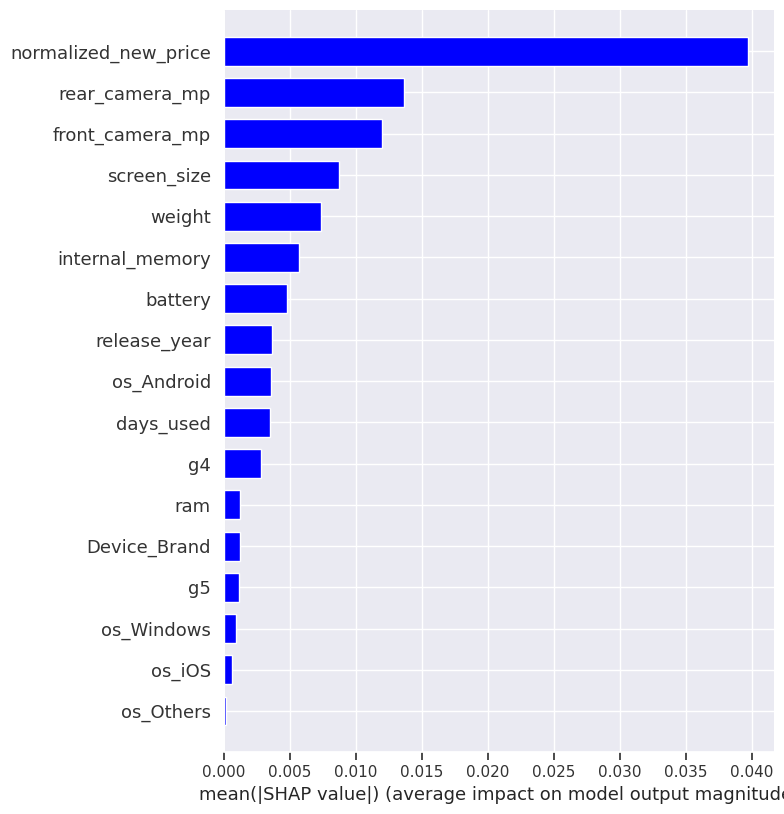

In [204]:
# SHAP variable importance for a Linear Model
shap.summary_plot(svm_shap_values, x_train, plot_type="bar", color="blue")

In [205]:
# Waterfall plot for linear model
def get_SHAP(index=18):
    shap.plots.waterfall(svm_shap_values[index], max_display=14)

**Interpreting Waterfall SHAP visualization**
It says that f(x) = 0.44 is what we got as a model output and the expected output for this sample was 0.542. We came pretty close to determining it as the difference is only 0.102. The waterfall model explains how we got the expected output, and which features contributed to what. The below graph shows that normalized_used_price has the biggest impact followed by rear_camera_mp and screen_size.


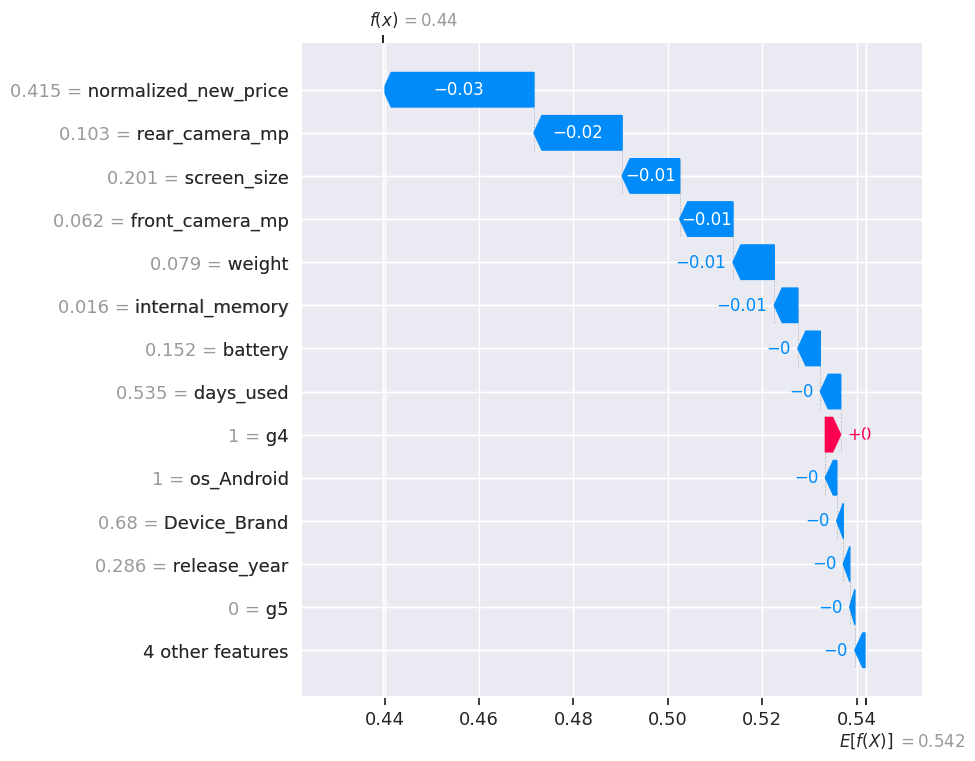

In [206]:
get_SHAP()

**Interpret the summary plot SVM Model**
Here the features are listed in descending order of their importance. This is one of the easiest ways to analyze an ML model and how the features are affecting the target and to what extent.





No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


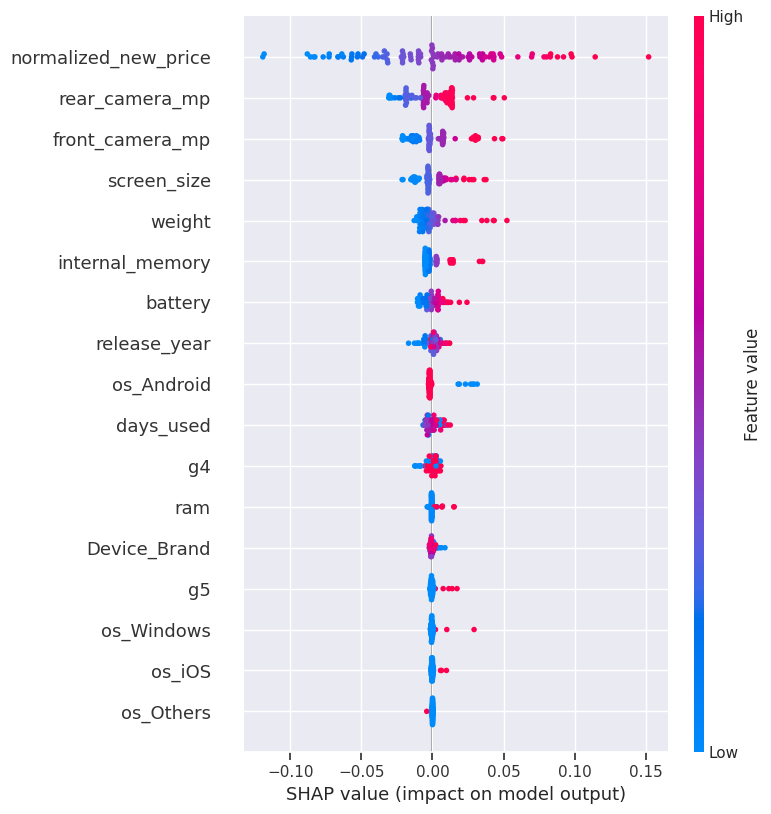

In [207]:
# SHAP summary for Linear Model
shap.summary_plot(svm_shap_values, x_train_100)

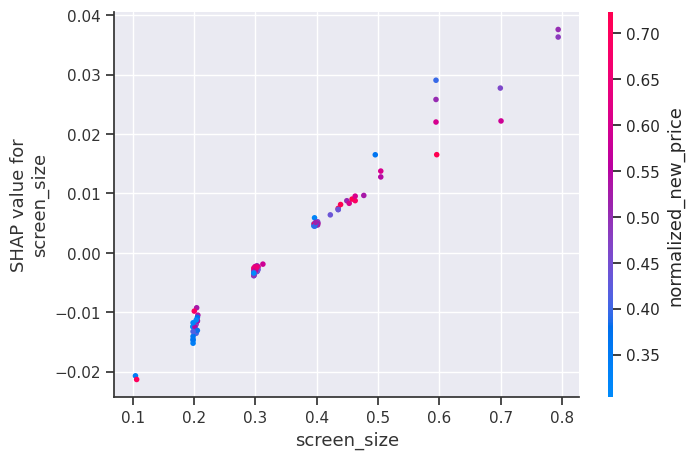

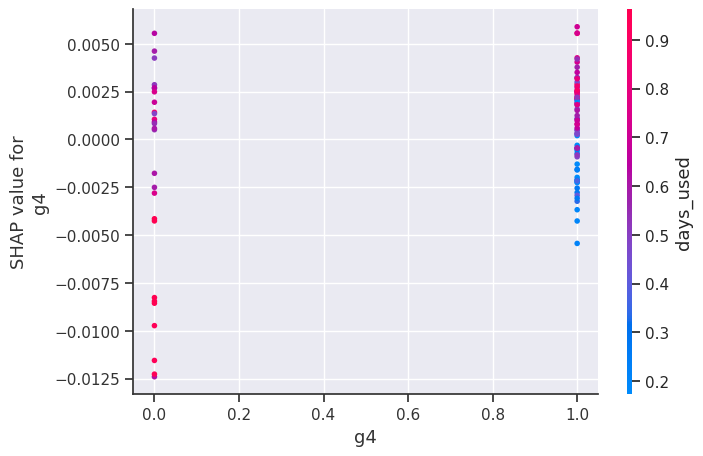

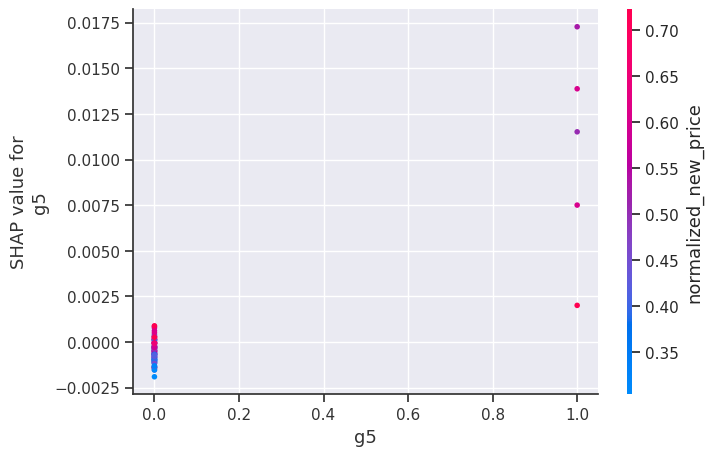

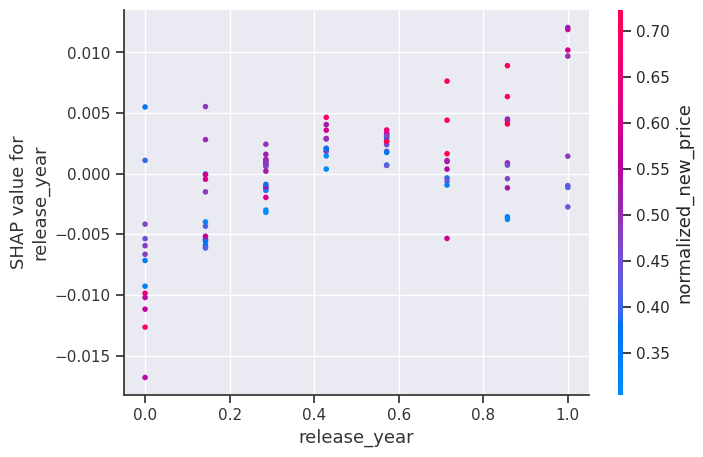

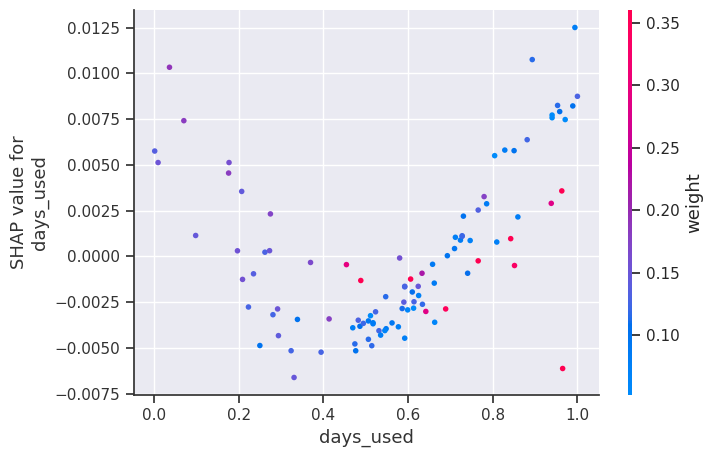

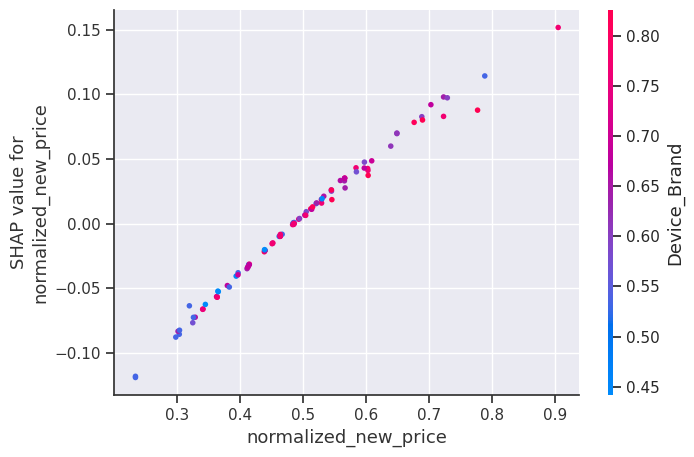

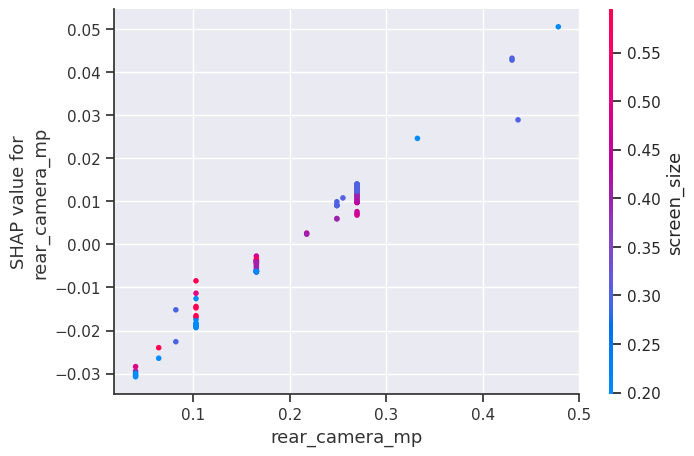

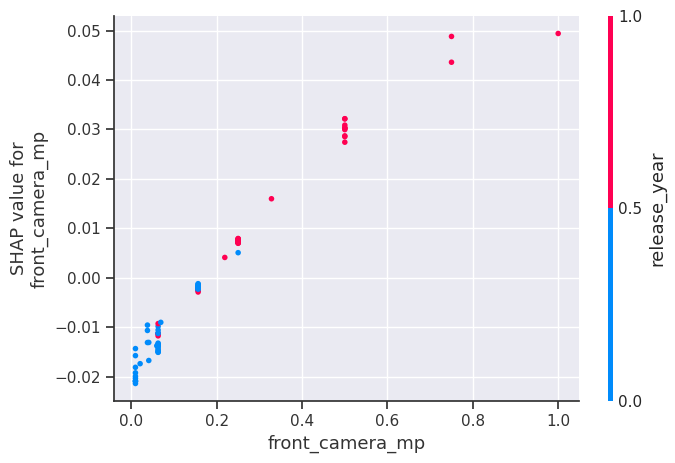

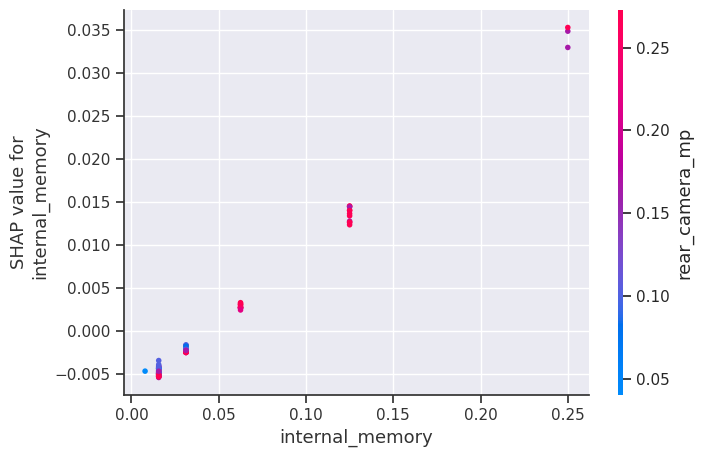

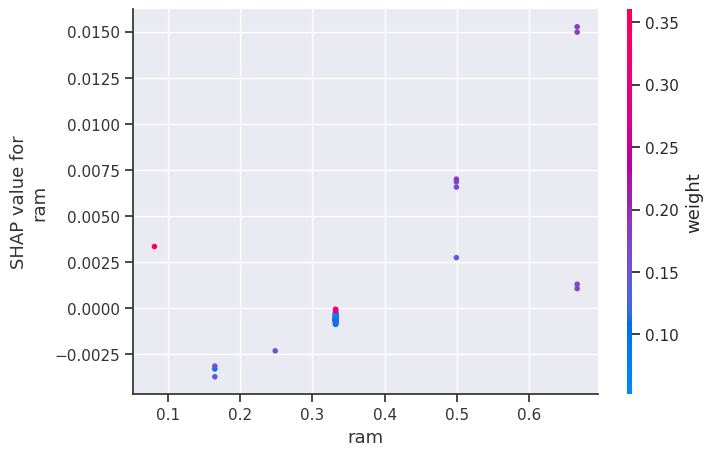

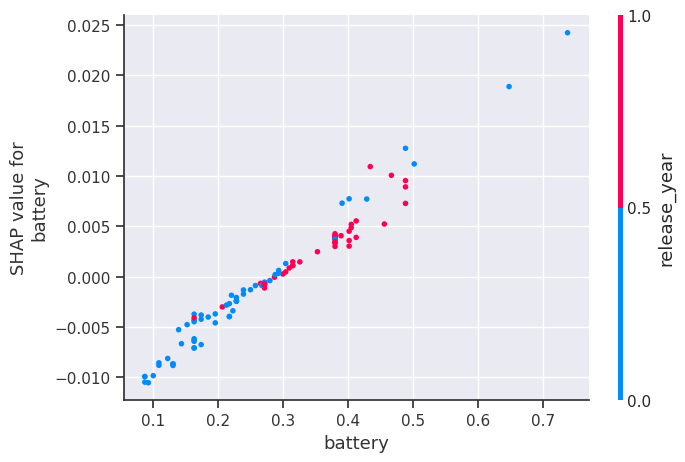

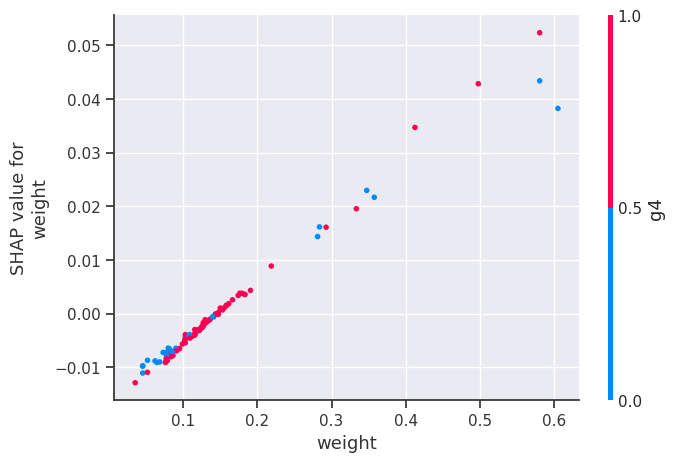

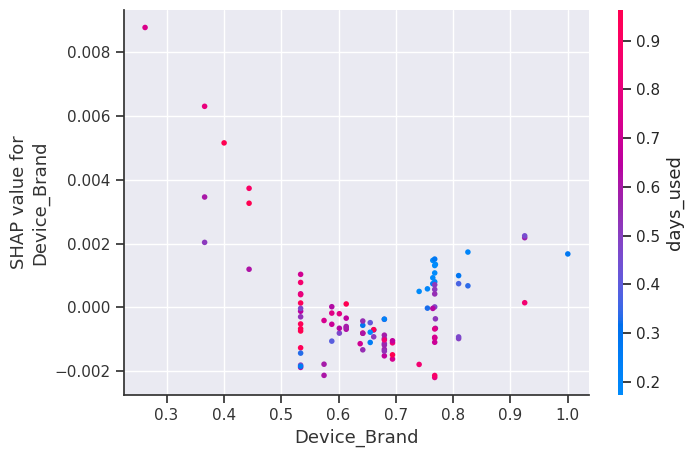

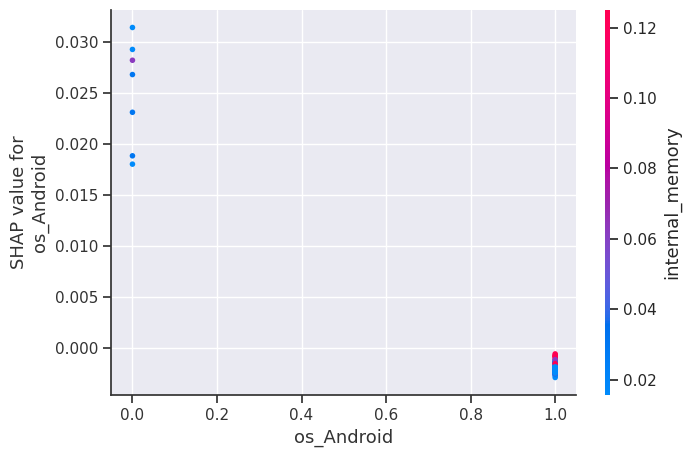

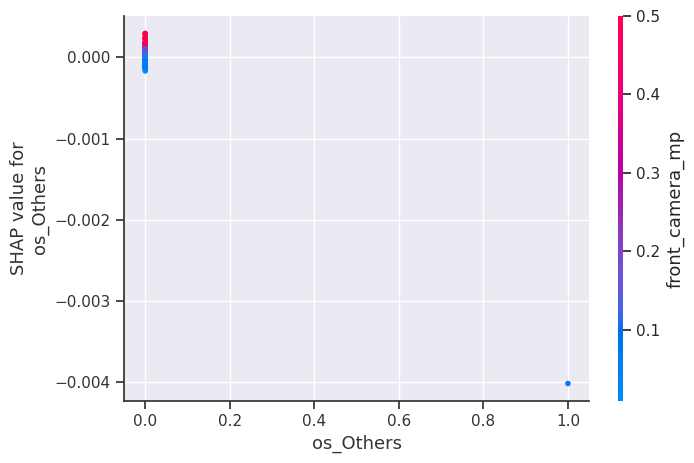

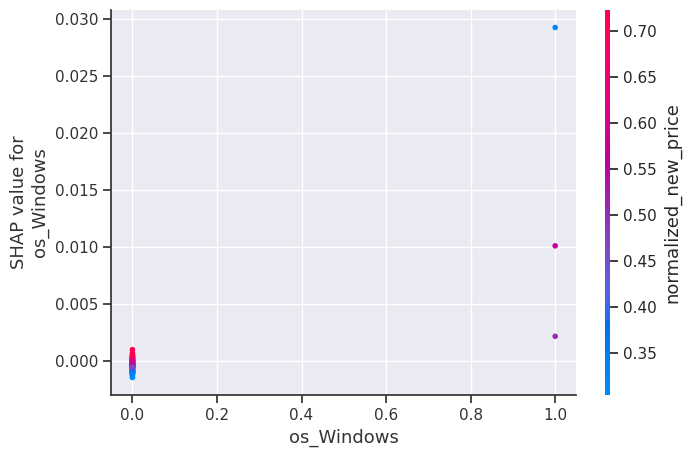

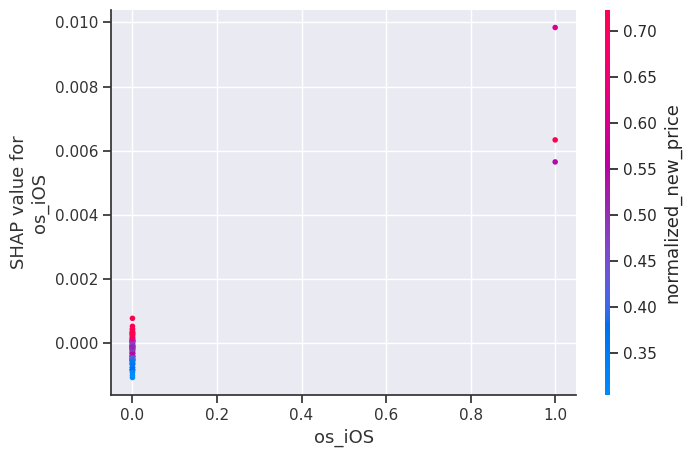

In [208]:
# SHAP partial dependence plot for a tree based model
for i in x_train.columns:
    shap.dependence_plot(i, svm_shap_values.values, x_train_100)

**Heatmap Visualization for Linear and Tree-based model**
This visualization is a summarization of the entire dataset on how each data point in every feature is affecting the target.
Here the Y-axis is Features
and X-axis is Instance of that feature
The color of the instance defines if it had a positive effect or negative effect by its color. If the instance is red then it had a positive effect and if the instance is blue then it had a negative effect
The intensity of the color is directly proportional to the intensity of the effect. Deeper the color, the more impactful the feature is

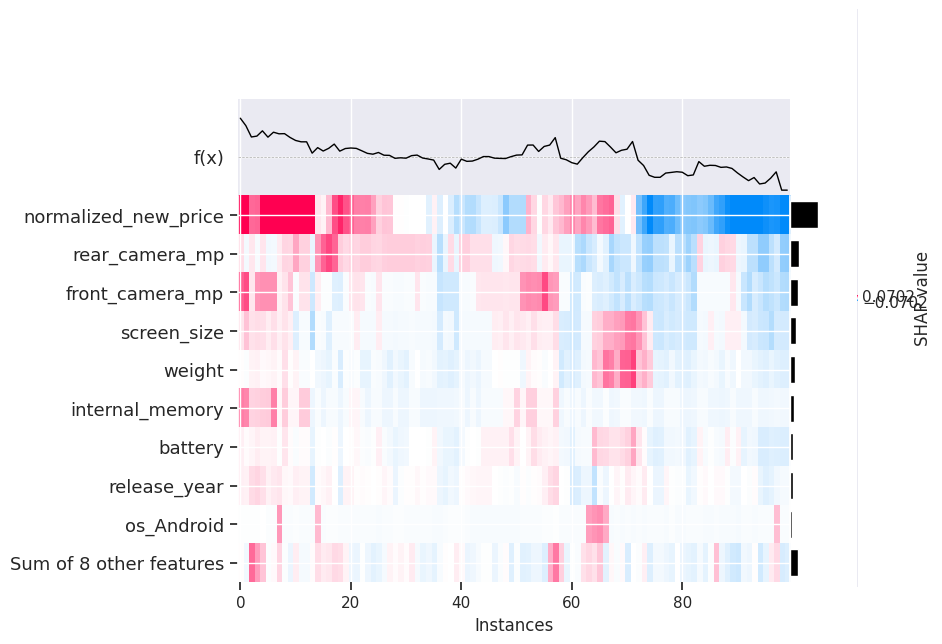

In [209]:
shap.plots.heatmap(svm_shap_values)  # SHAP HeatMap of a Tree Based Model

In [210]:
!pip install -U scikit-learn



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Interpreting AutoML's best model with tuned hyperparameters**

How are errors/residuals distributed and how interpretable is your model ?

Residual Analysis

Here, we can see the striped lines of residuals, which is an artifact of having an integer value as a response value, instead of a real value. It can also be observed from the below graph that residuals are normally distributed. Residuals signify that residuals don't have heteroscedasticity.
Variable Importance

In the variable importance plot we can observe that the plot replicates the results which we got from the Linear Model and Tree-Based Model above. The variable importance has been scaled between 0 to 1 for ease of understanding

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

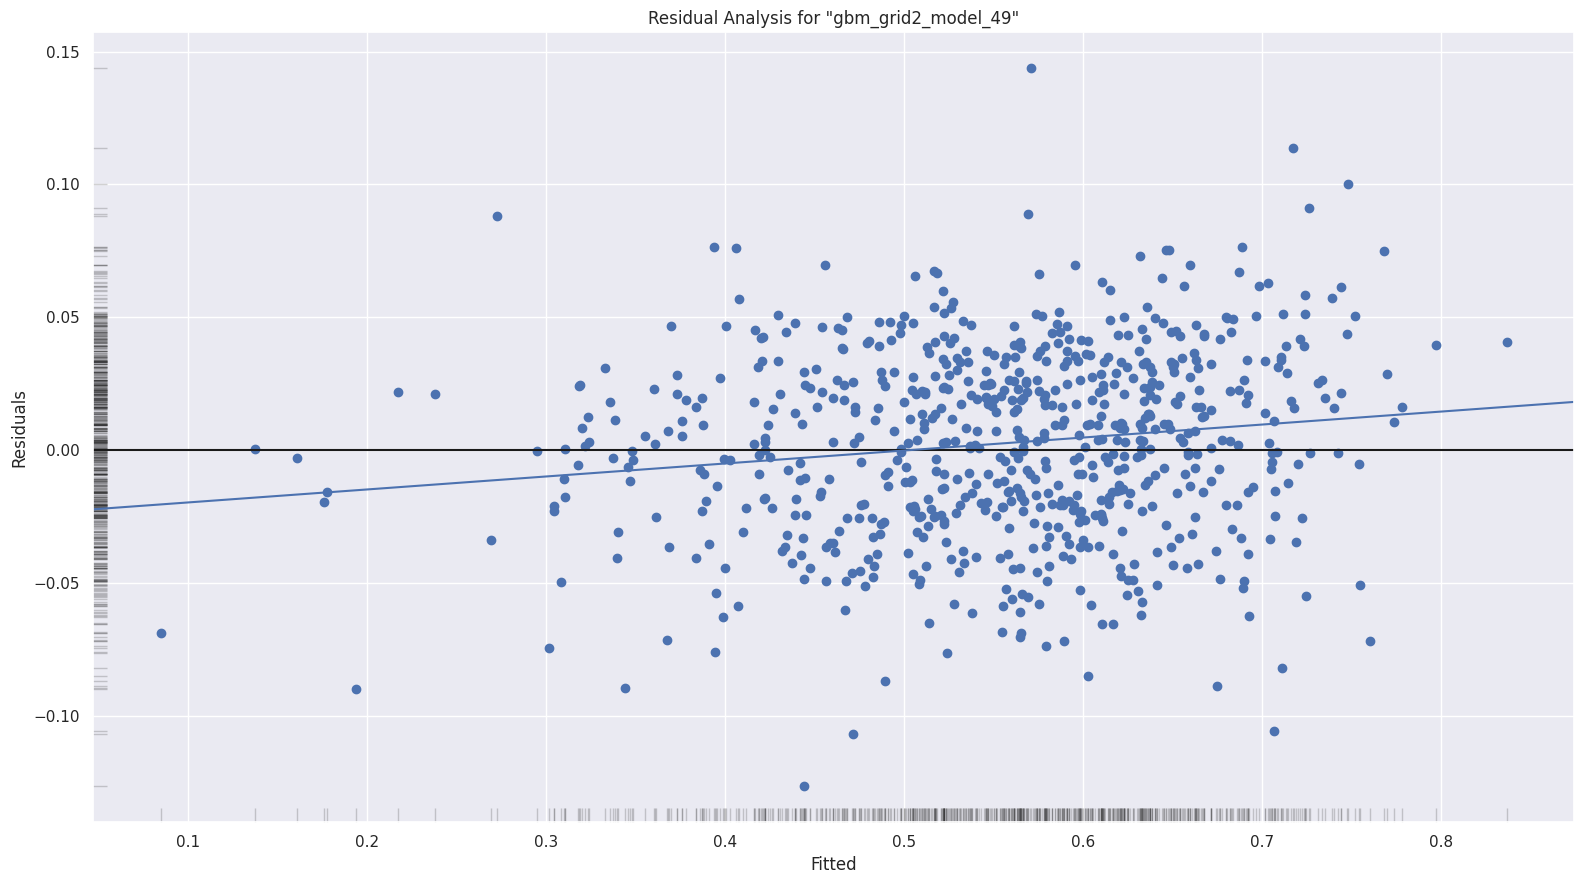

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

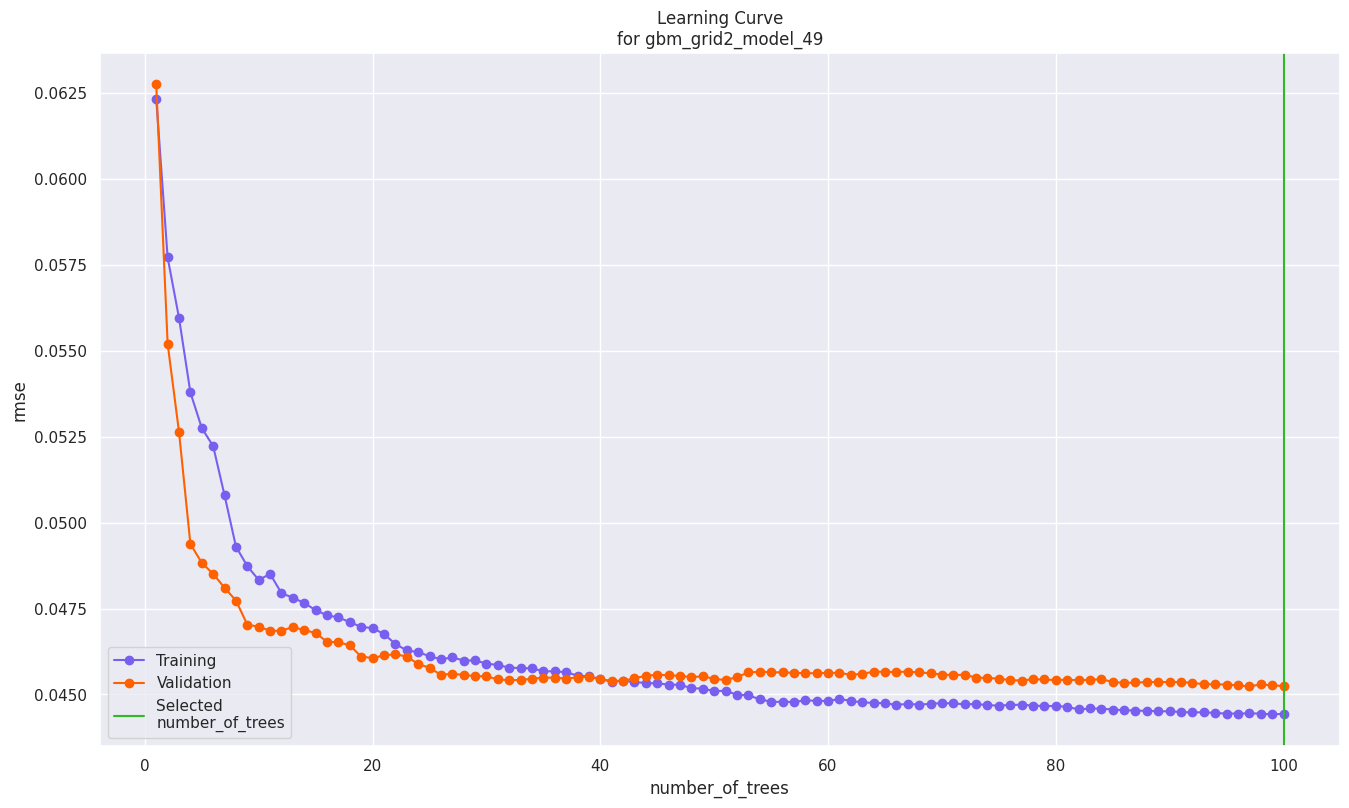

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

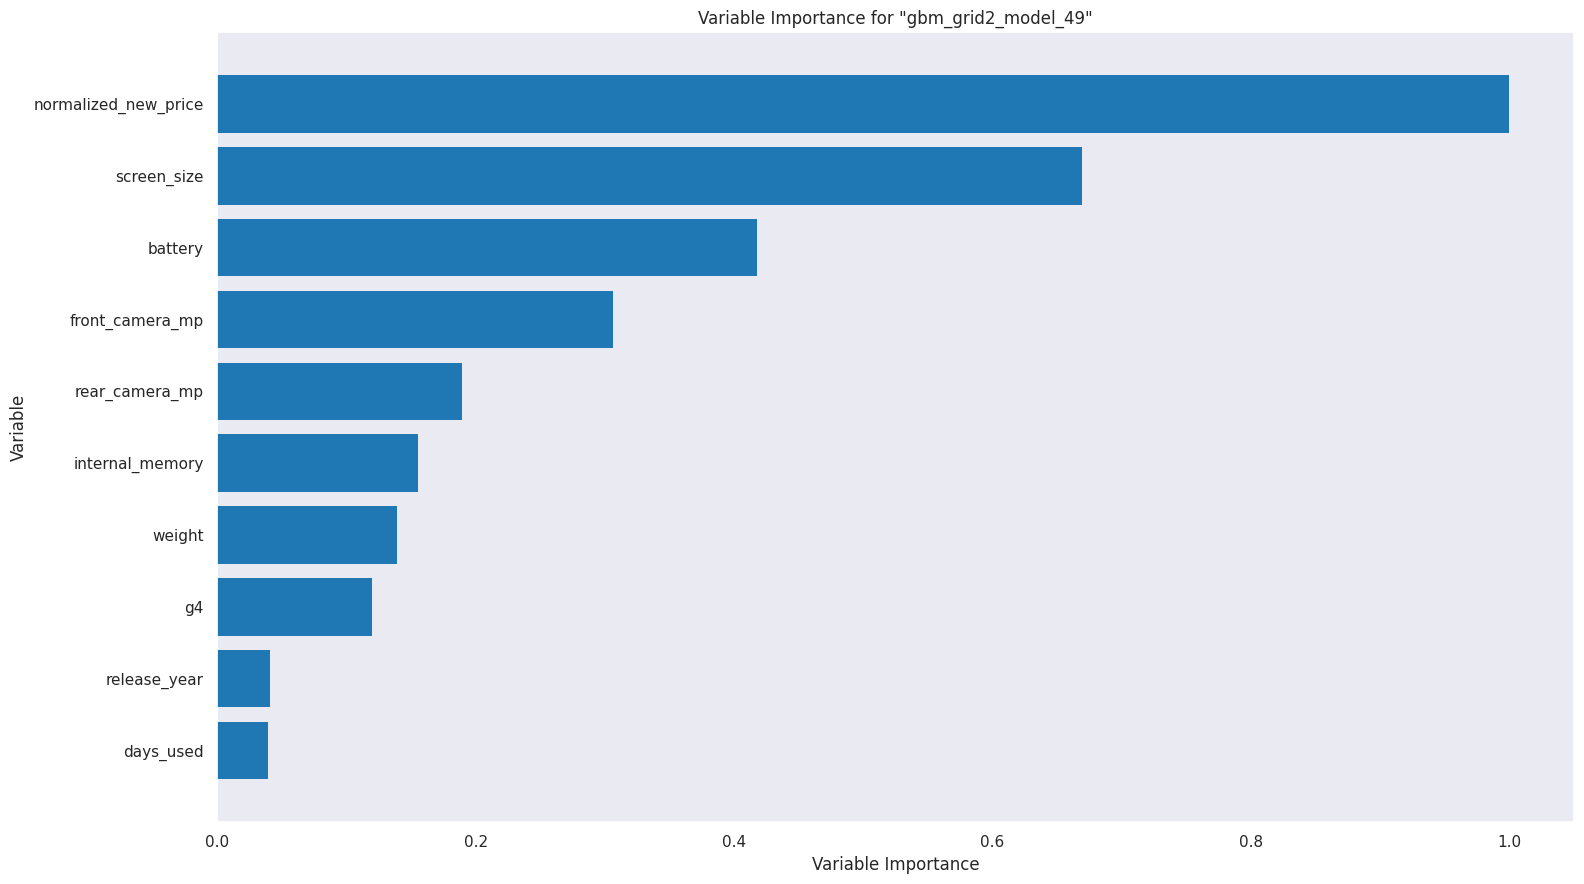

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

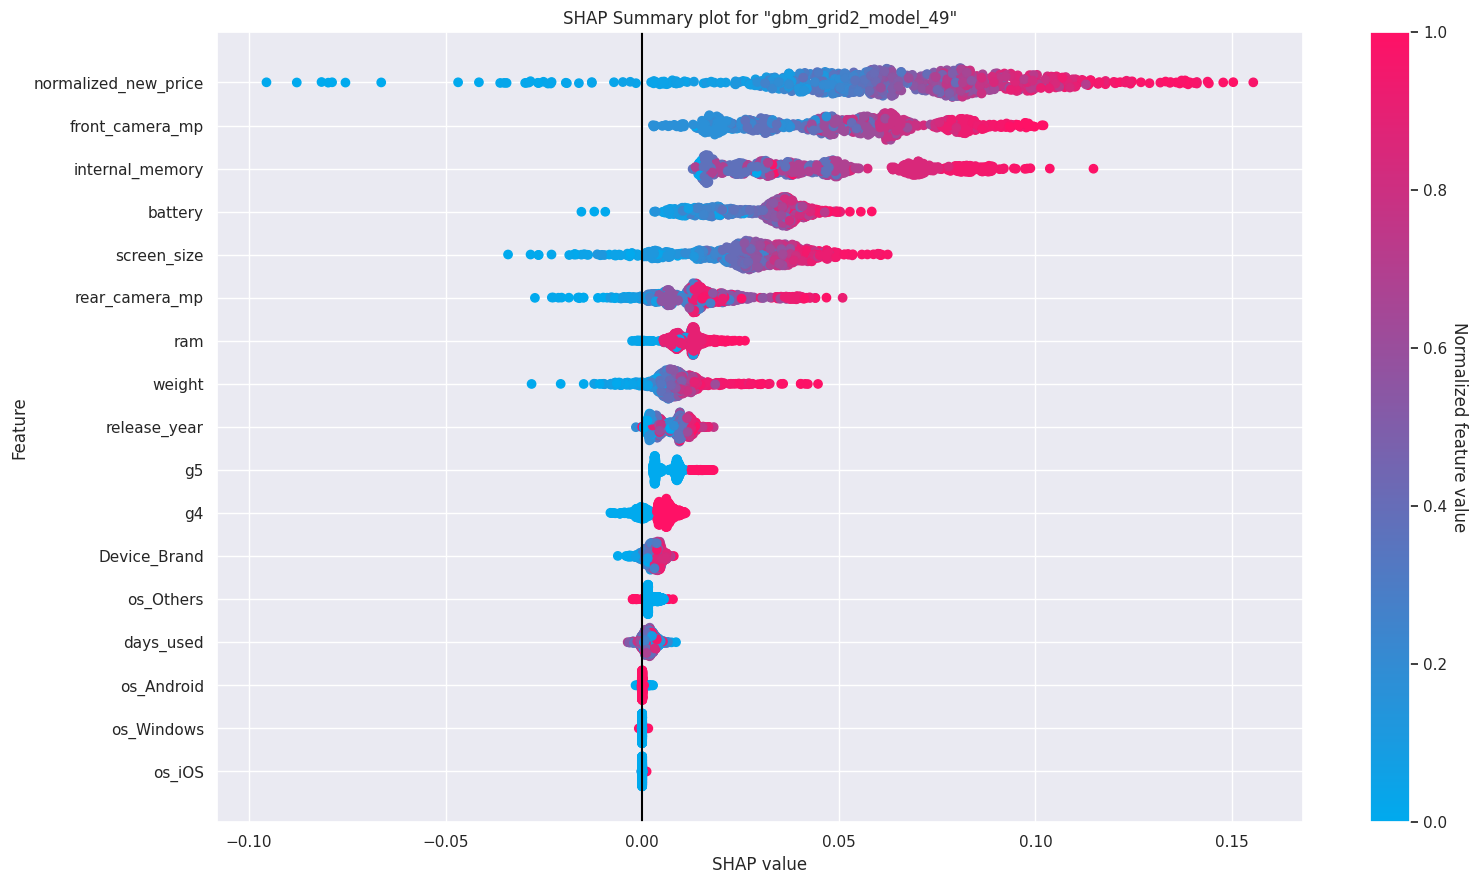

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

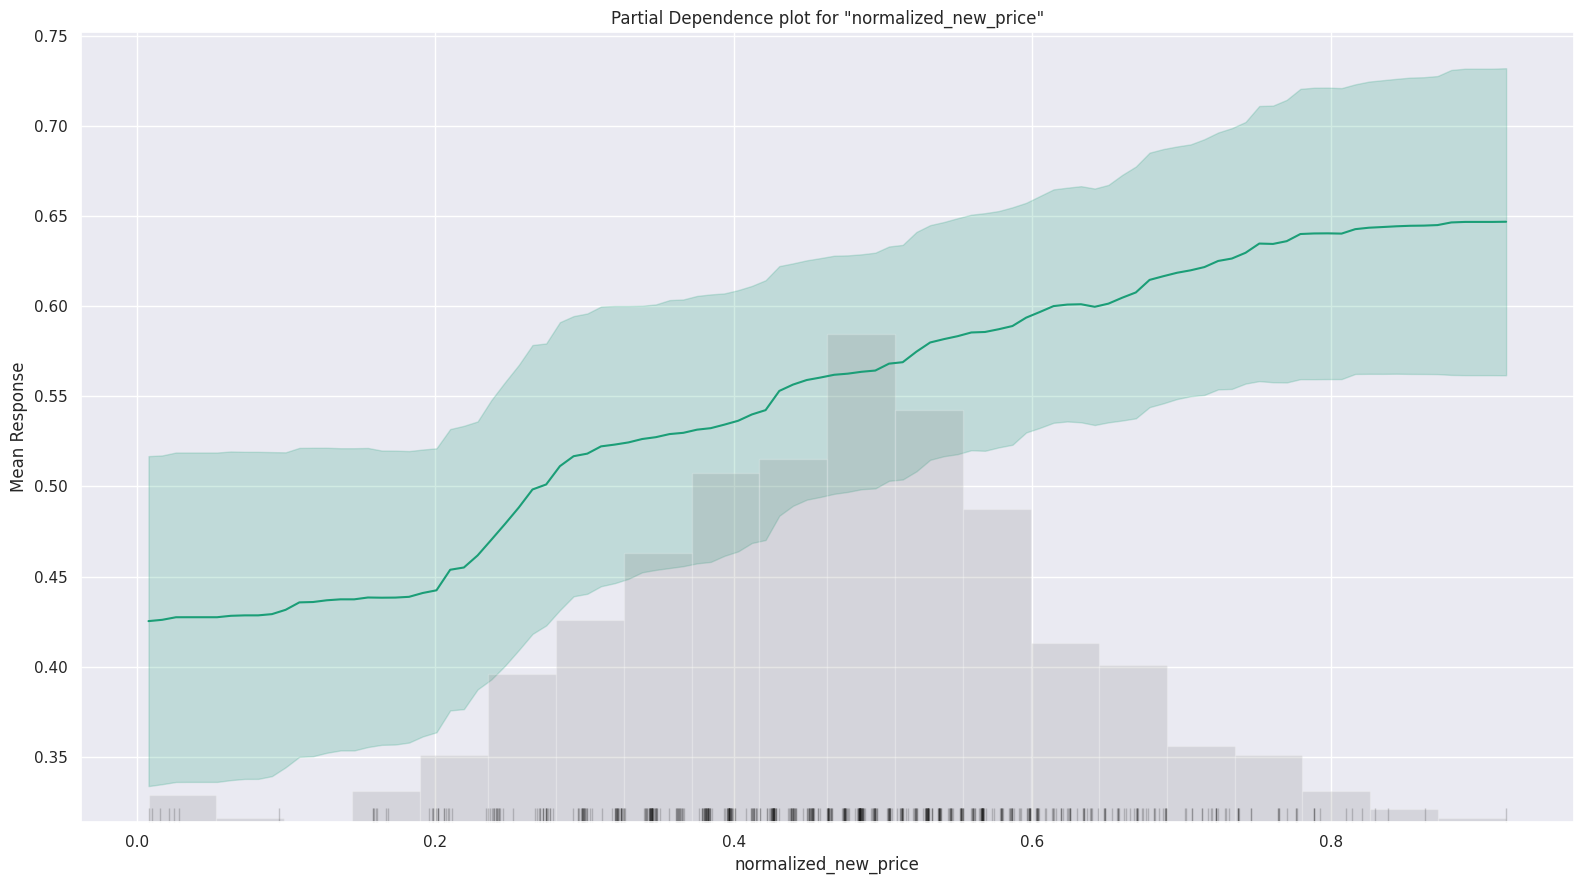

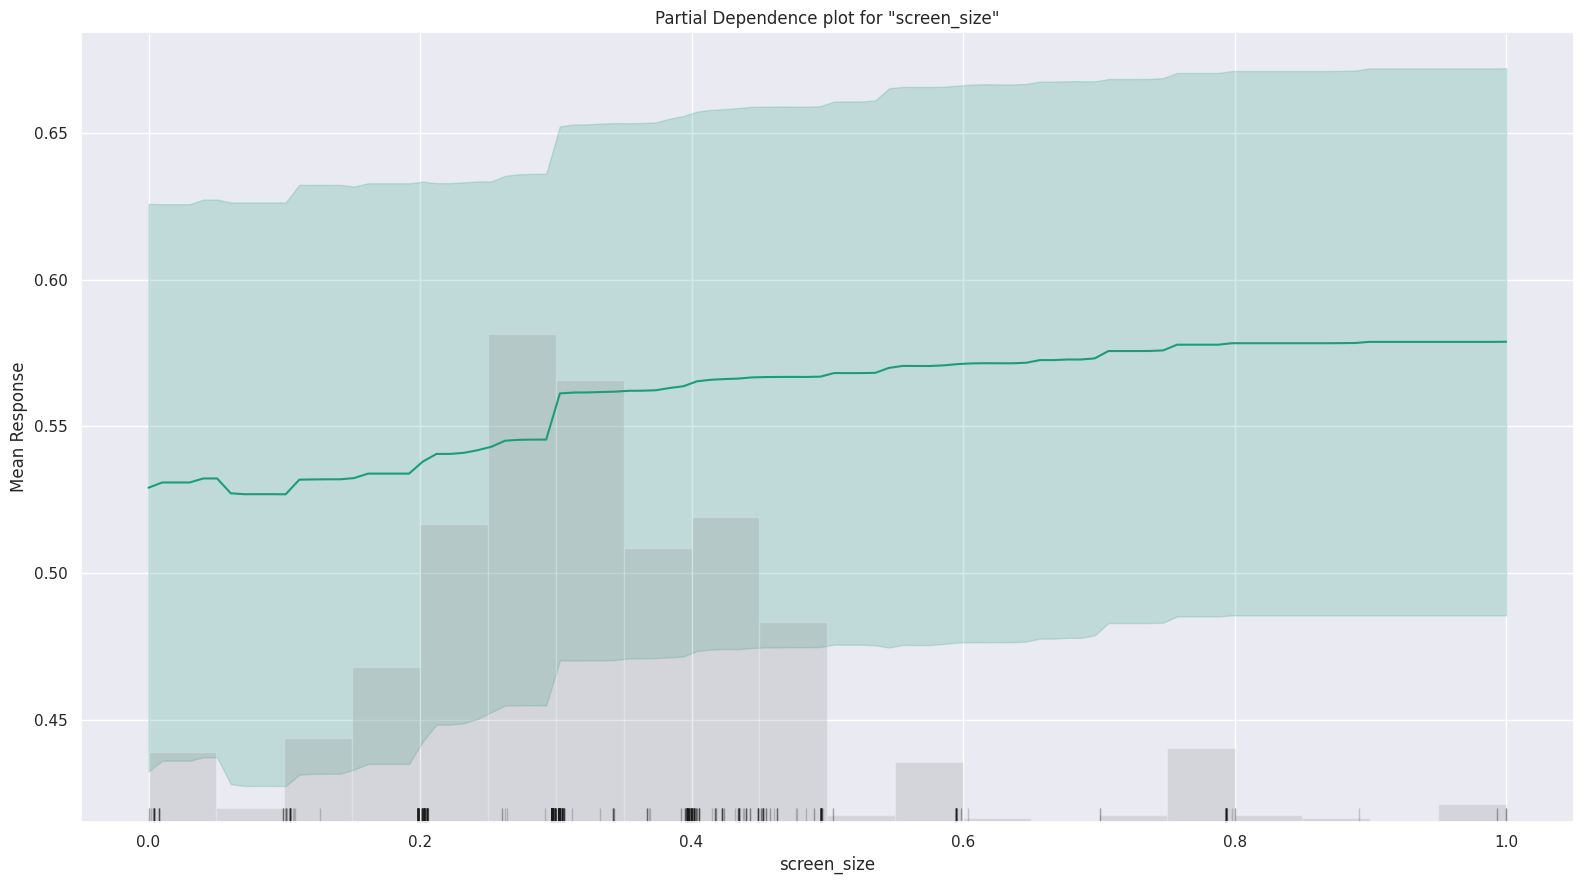

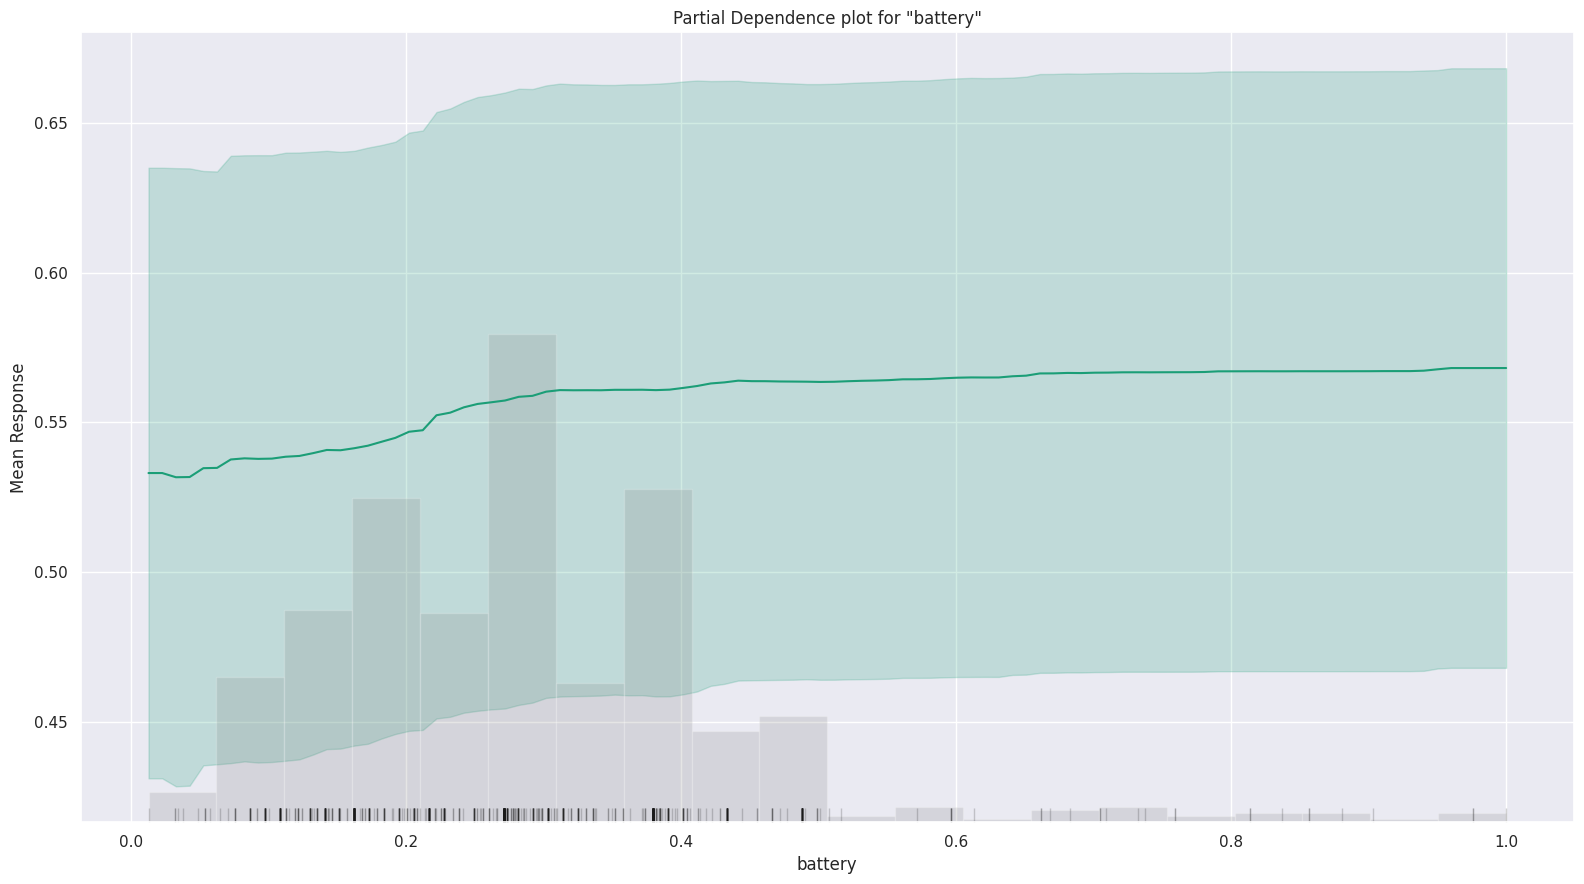

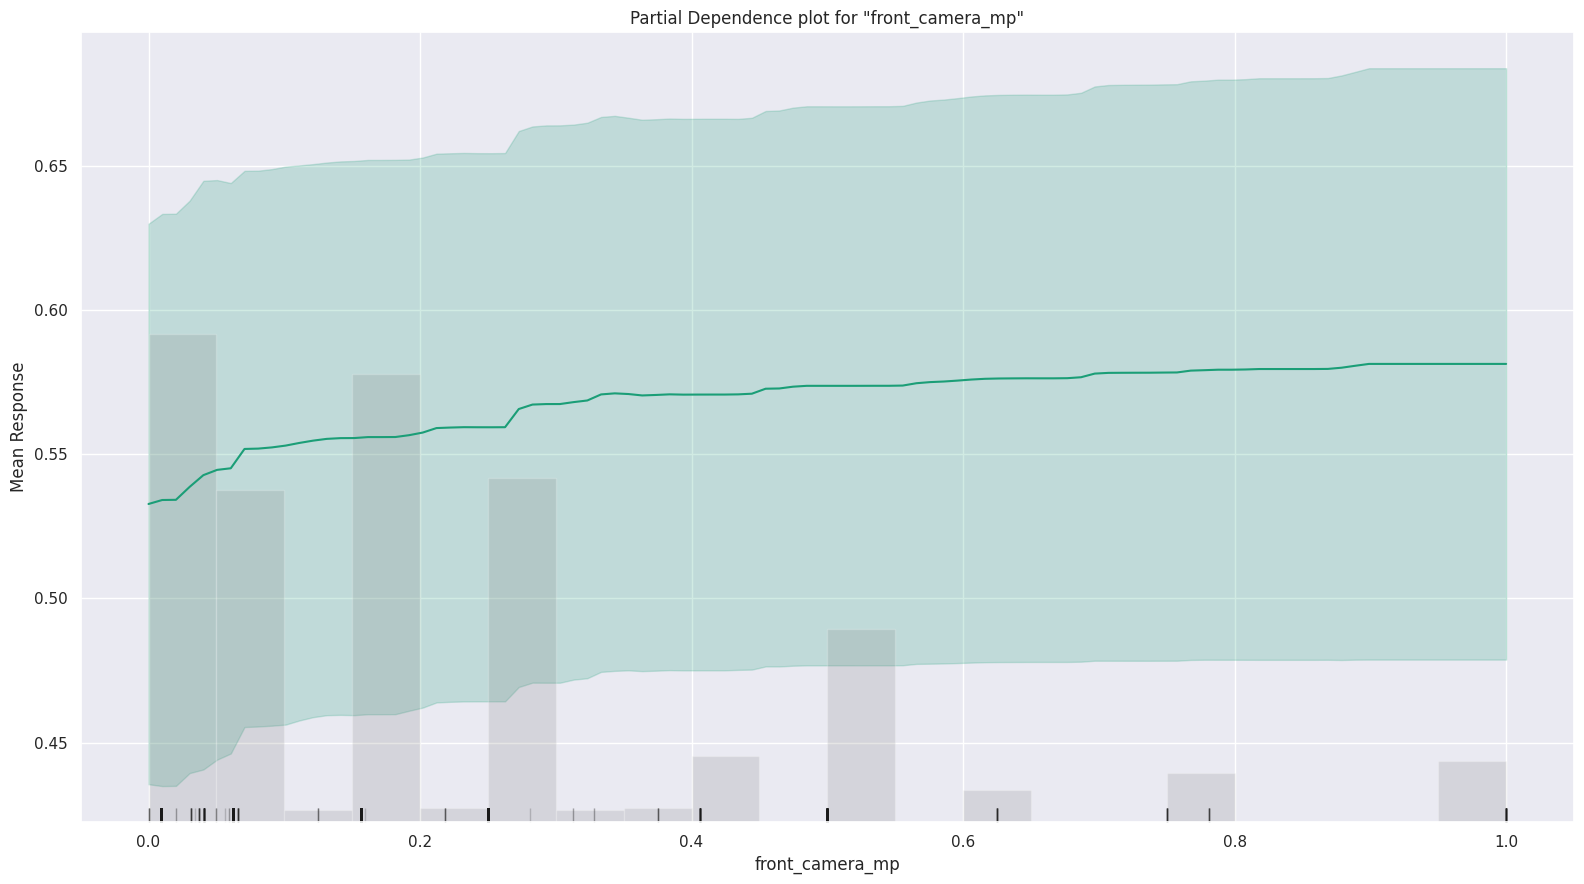

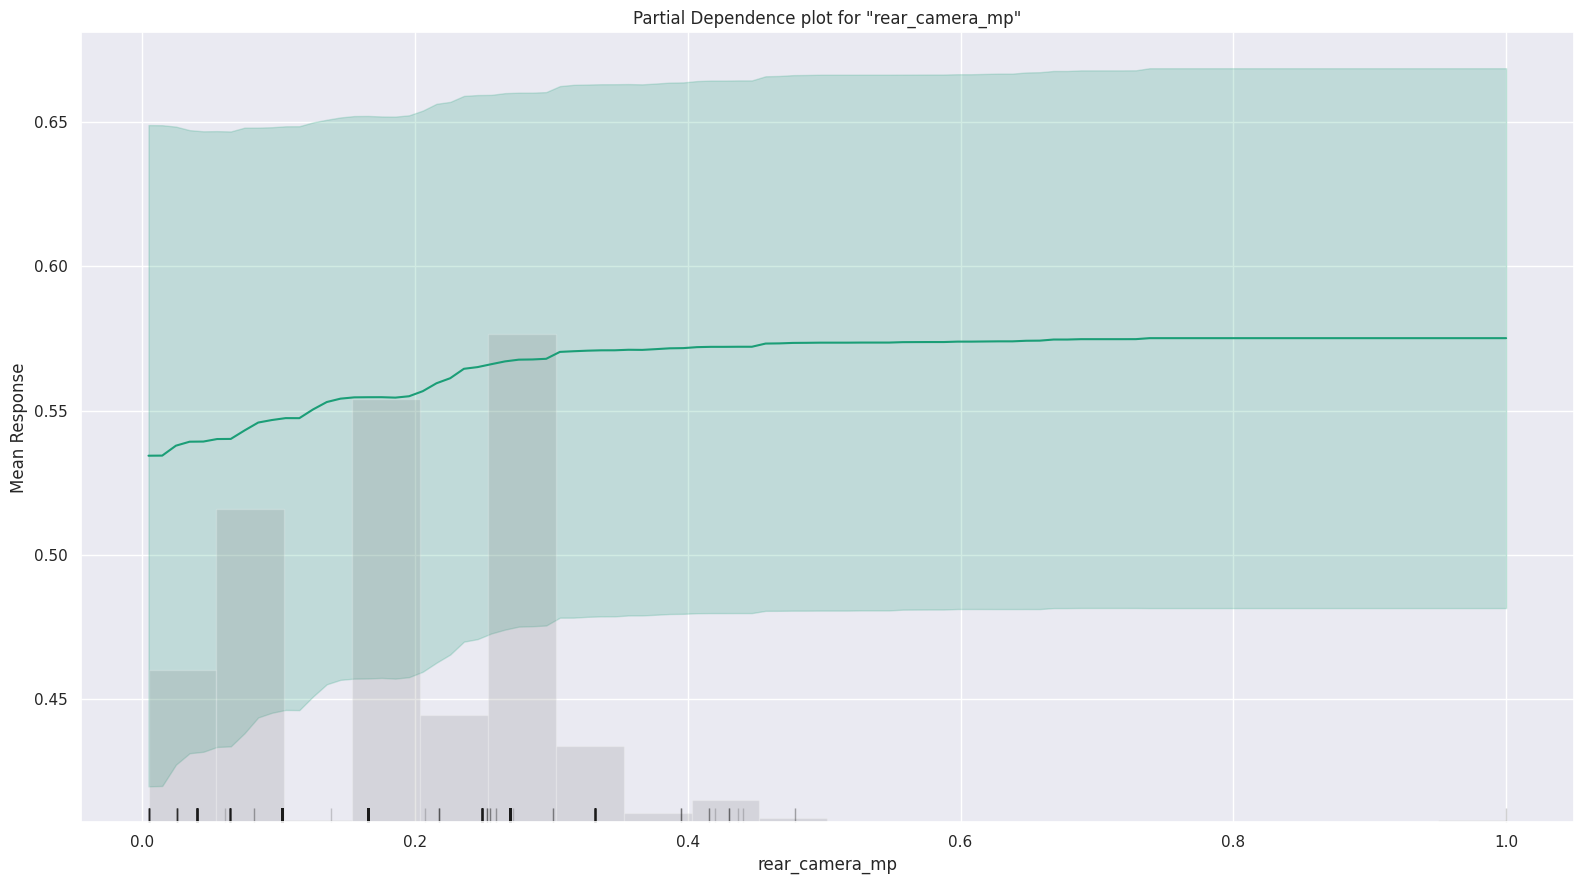

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

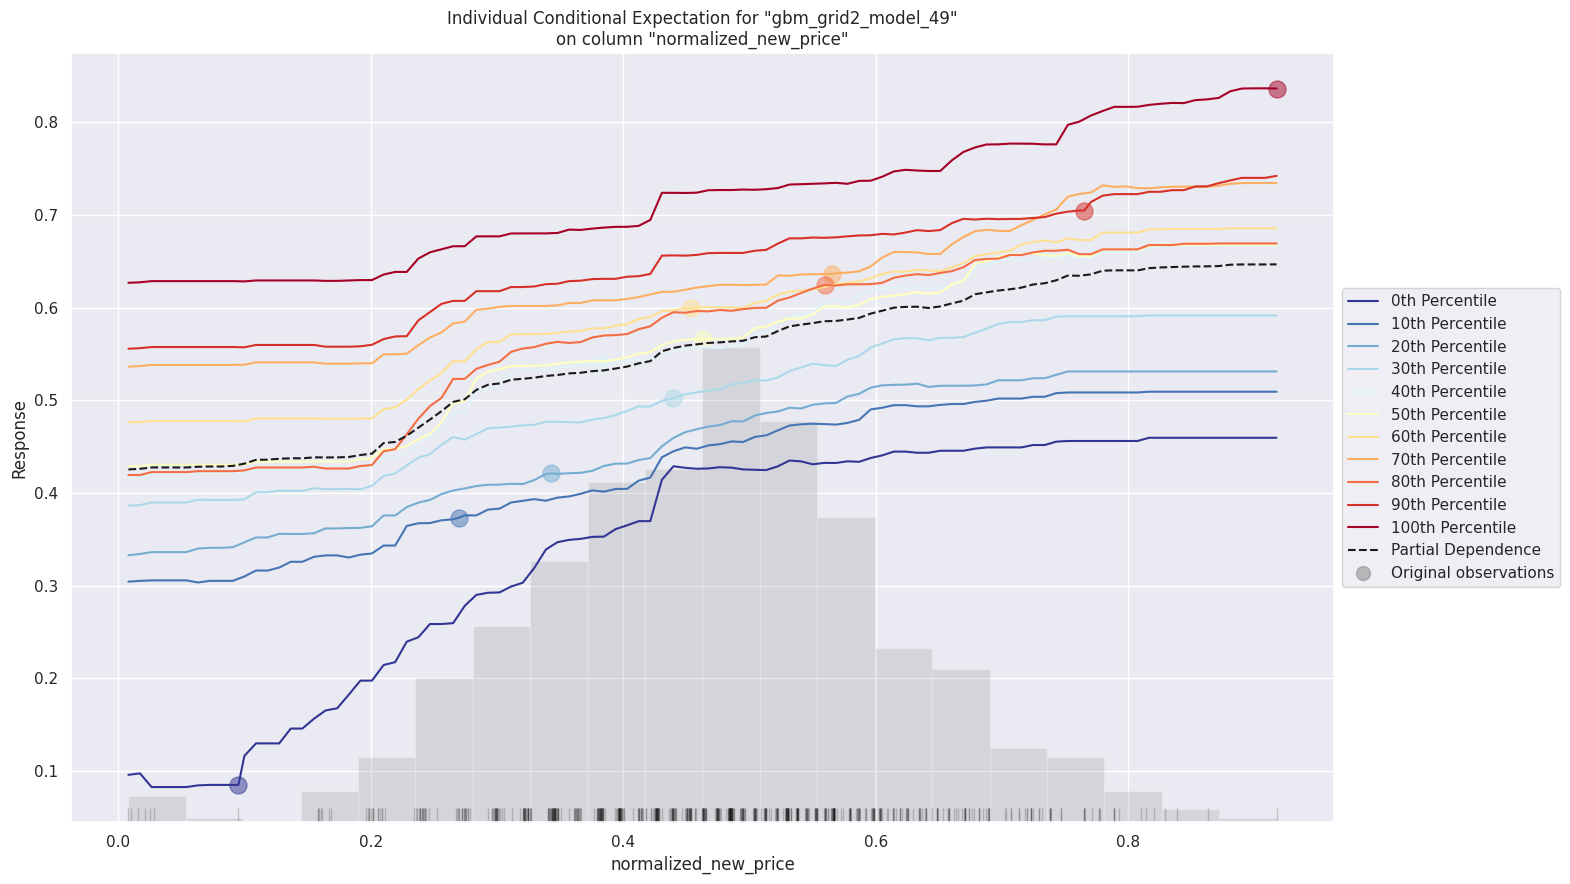

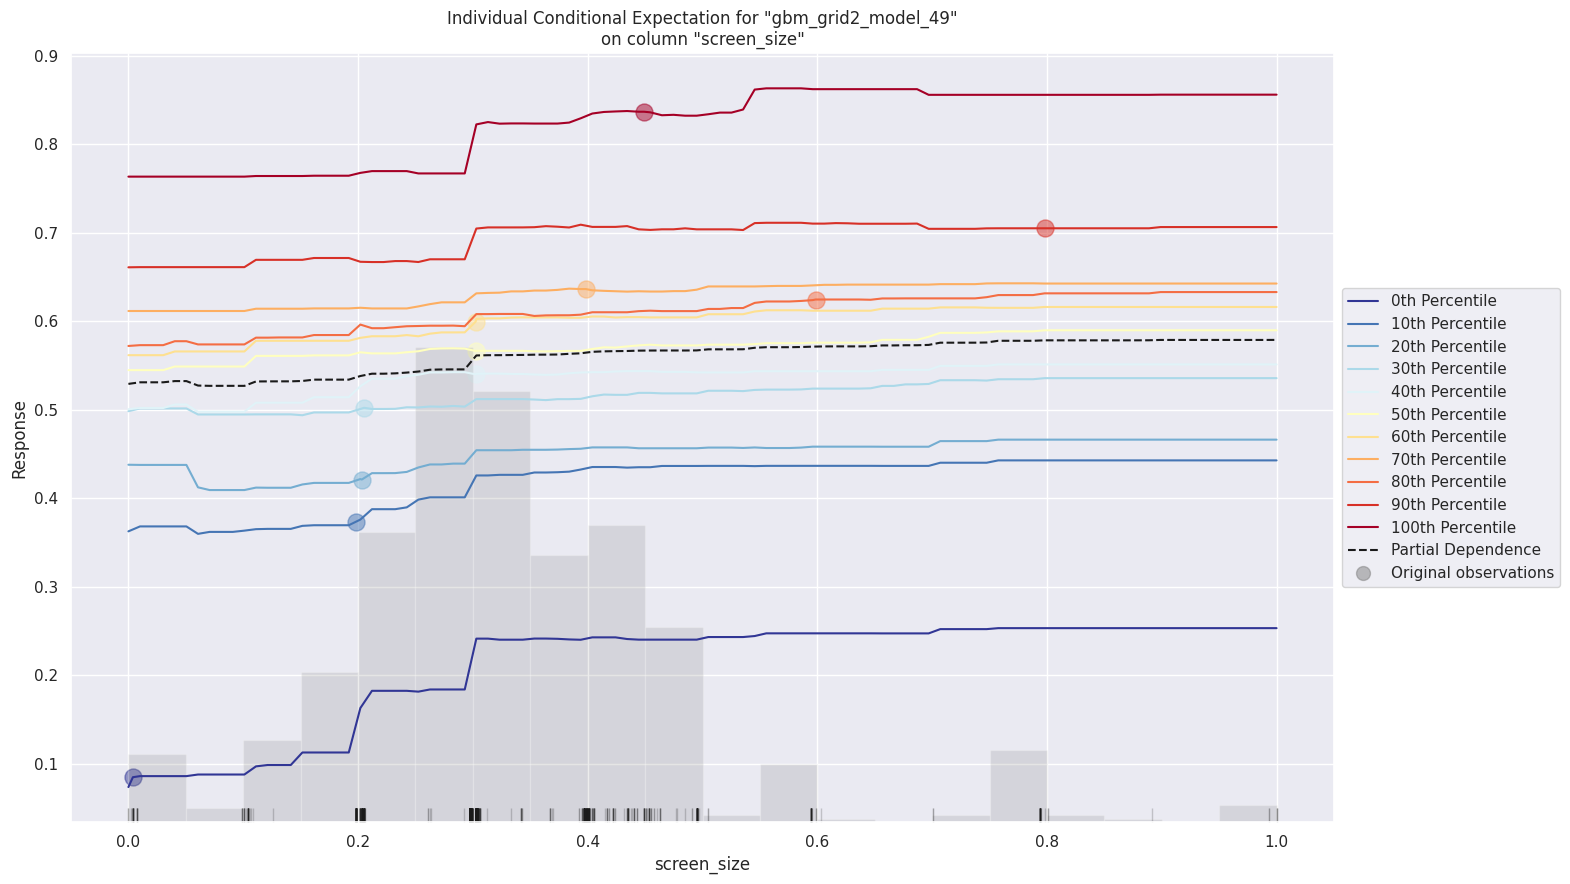

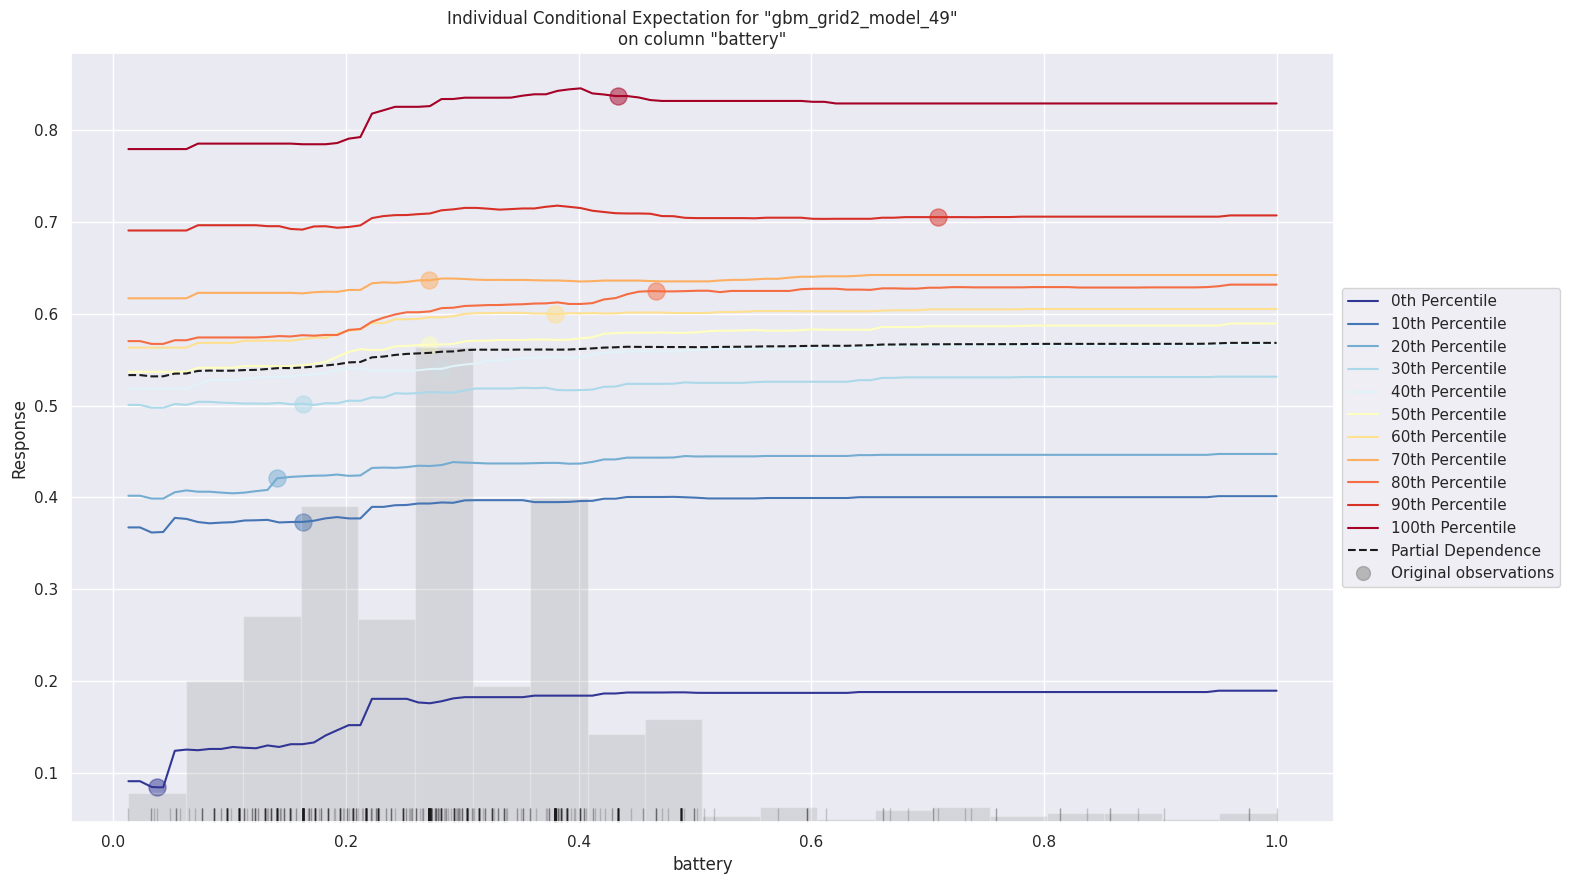

In [ ]:
best_drf_model.explain(autoML[1])  # AutoML Explainability

**Learning Outcomes**

I have gained knowledge about the complete lifecycle of a Data Science project, starting from data preparation to hyperparameter tuning. I have learned that data preparation is the most critical step and requires significant investment in tasks such as data cleaning, normalization, feature selection, and imputation.

After data preparation, the second most important step is hyperparameter tuning. It involves training multiple models and selecting the best ones for deployment, as certain algorithms perform better than others for specific tasks.

The most valuable takeaway from this assignment series is Model Interpretation, which involves understanding how a model makes predictions. Techniques such as SHAP, LIME, and PDP have made it easier to unbox the black box of models and gain insights into what factors influenced the model's predictions.

**References**

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/Full_ML_Report/Wine-Quality-Analysis.ipynb

https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html

https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

# **MIT License**
Copyright (c) 2023 Aishwarya Adduri

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.